In [1]:
#Exercises:
#E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?
#E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?
#E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?
#E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?
#E05: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?
#E06: meta-exercise! Think of a fun/interesting exercise and complete it.


In [2]:
#E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?


In [3]:
#PART 1 - COUNTING WAY

In [4]:
words = open("names.txt", "r").read().splitlines()

In [5]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [6]:
t = {}

for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1, ch2, ch3)
        t[trigram] = t.get(trigram, 0) + 1

In [7]:
sorted(t.items(), key=lambda kv: -kv[1])

[(('a', 'h', '<E>'), 1714),
 (('n', 'a', '<E>'), 1673),
 (('a', 'n', '<E>'), 1509),
 (('o', 'n', '<E>'), 1503),
 (('<S>', 'm', 'a'), 1453),
 (('<S>', 'j', 'a'), 1255),
 (('<S>', 'k', 'a'), 1254),
 (('e', 'n', '<E>'), 1217),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '<E>'), 953),
 (('a', 'r', 'i'), 950),
 (('i', 'a', '<E>'), 903),
 (('i', 'e', '<E>'), 858),
 (('a', 'n', 'n'), 825),
 (('e', 'l', 'l'), 822),
 (('a', 'n', 'a'), 804),
 (('i', 'a', 'n'), 790),
 (('m', 'a', 'r'), 776),
 (('i', 'n', '<E>'), 766),
 (('e', 'l', '<E>'), 727),
 (('y', 'a', '<E>'), 716),
 (('a', 'n', 'i'), 703),
 (('<S>', 'd', 'a'), 700),
 (('l', 'a', '<E>'), 684),
 (('e', 'r', '<E>'), 683),
 (('i', 'y', 'a'), 669),
 (('l', 'a', 'n'), 647),
 (('<S>', 'b', 'r'), 646),
 (('n', 'n', 'a'), 633),
 (('<S>', 'a', 'l'), 632),
 (('<S>', 'c', 'a'), 628),
 (('r', 'a', '<E>'), 627),
 (('n', 'i', '<E>'), 625),
 (('<S>', 'a', 'n'), 623),
 (('n', 'n', '<E>'), 619),
 (('n', 'e', '<E>'), 607),
 (('e', 'e', '<E>'), 605),
 (('e', 'y', '<

In [8]:
import torch

In [9]:
N = torch.zeros((27,27,27), dtype=torch.int32) # count matrix

In [10]:
chars = sorted(list(set(''.join(words)))) #unique chars of dataset
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [11]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        N[ix1, ix2, ix3] += 1

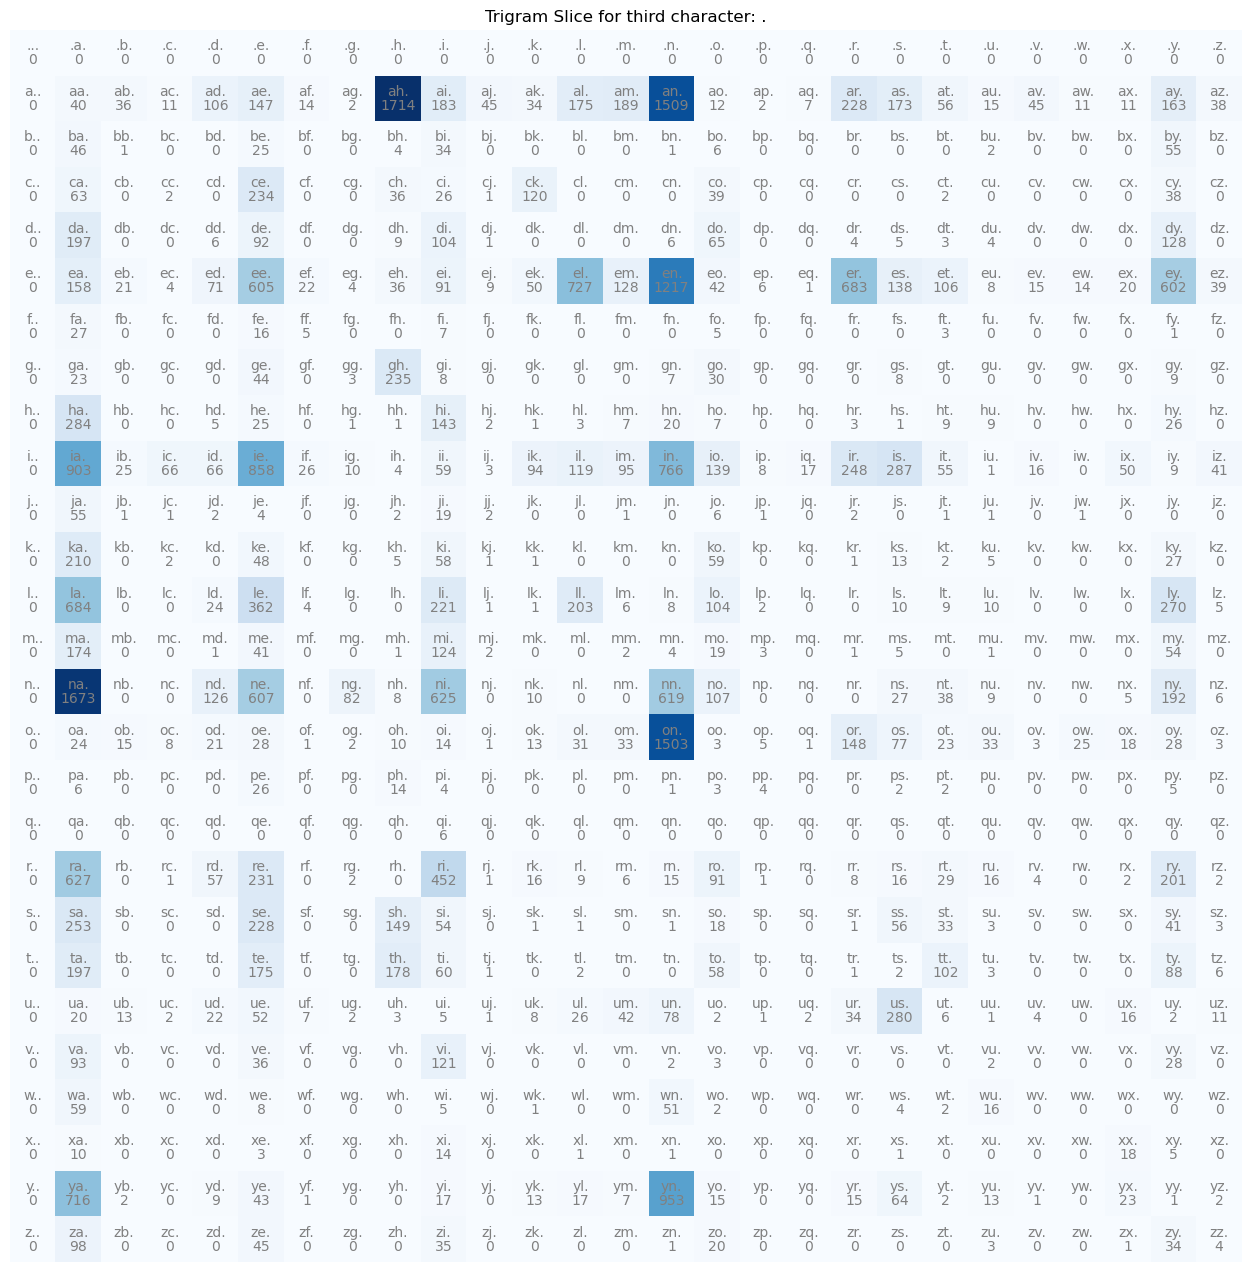

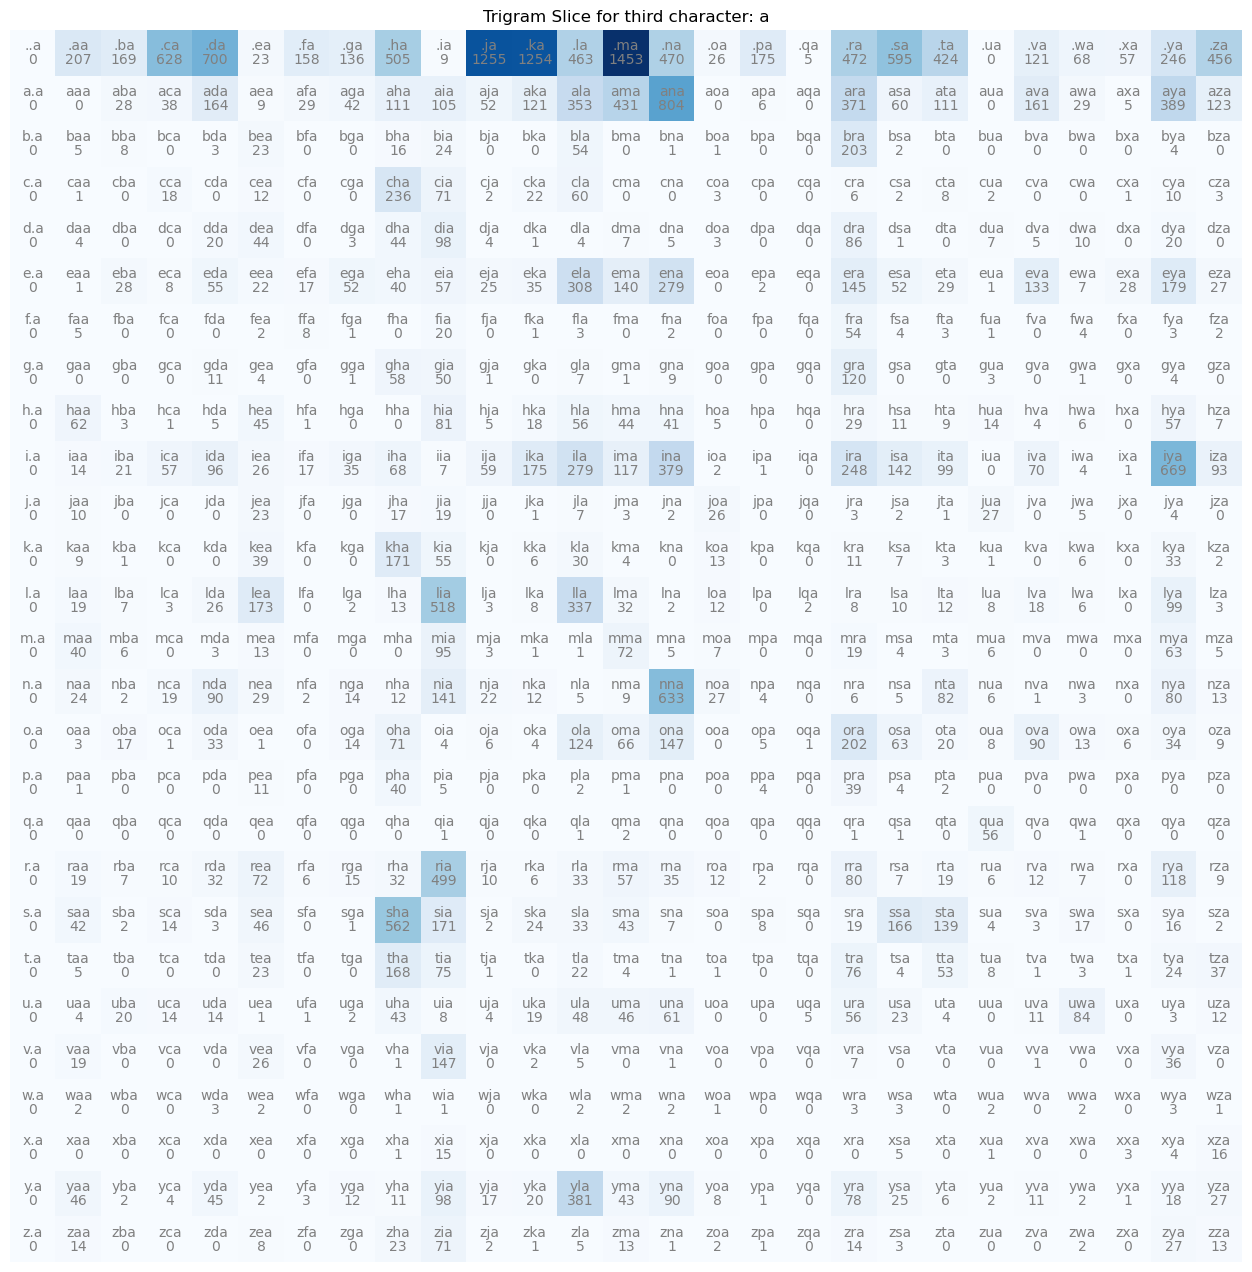

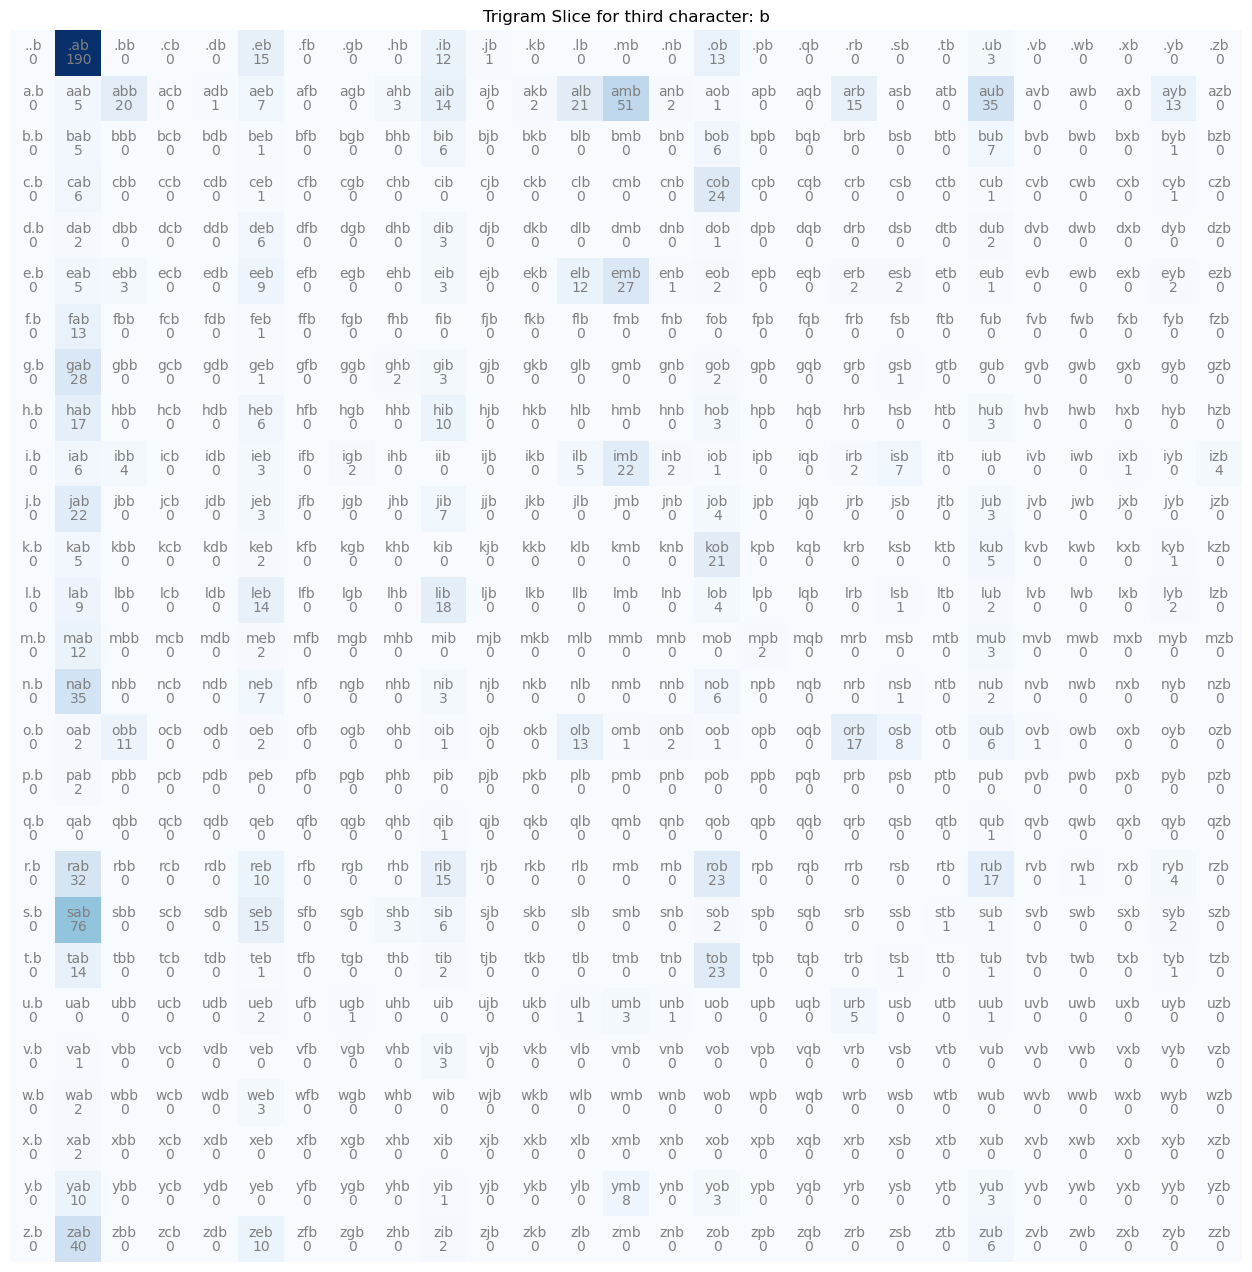

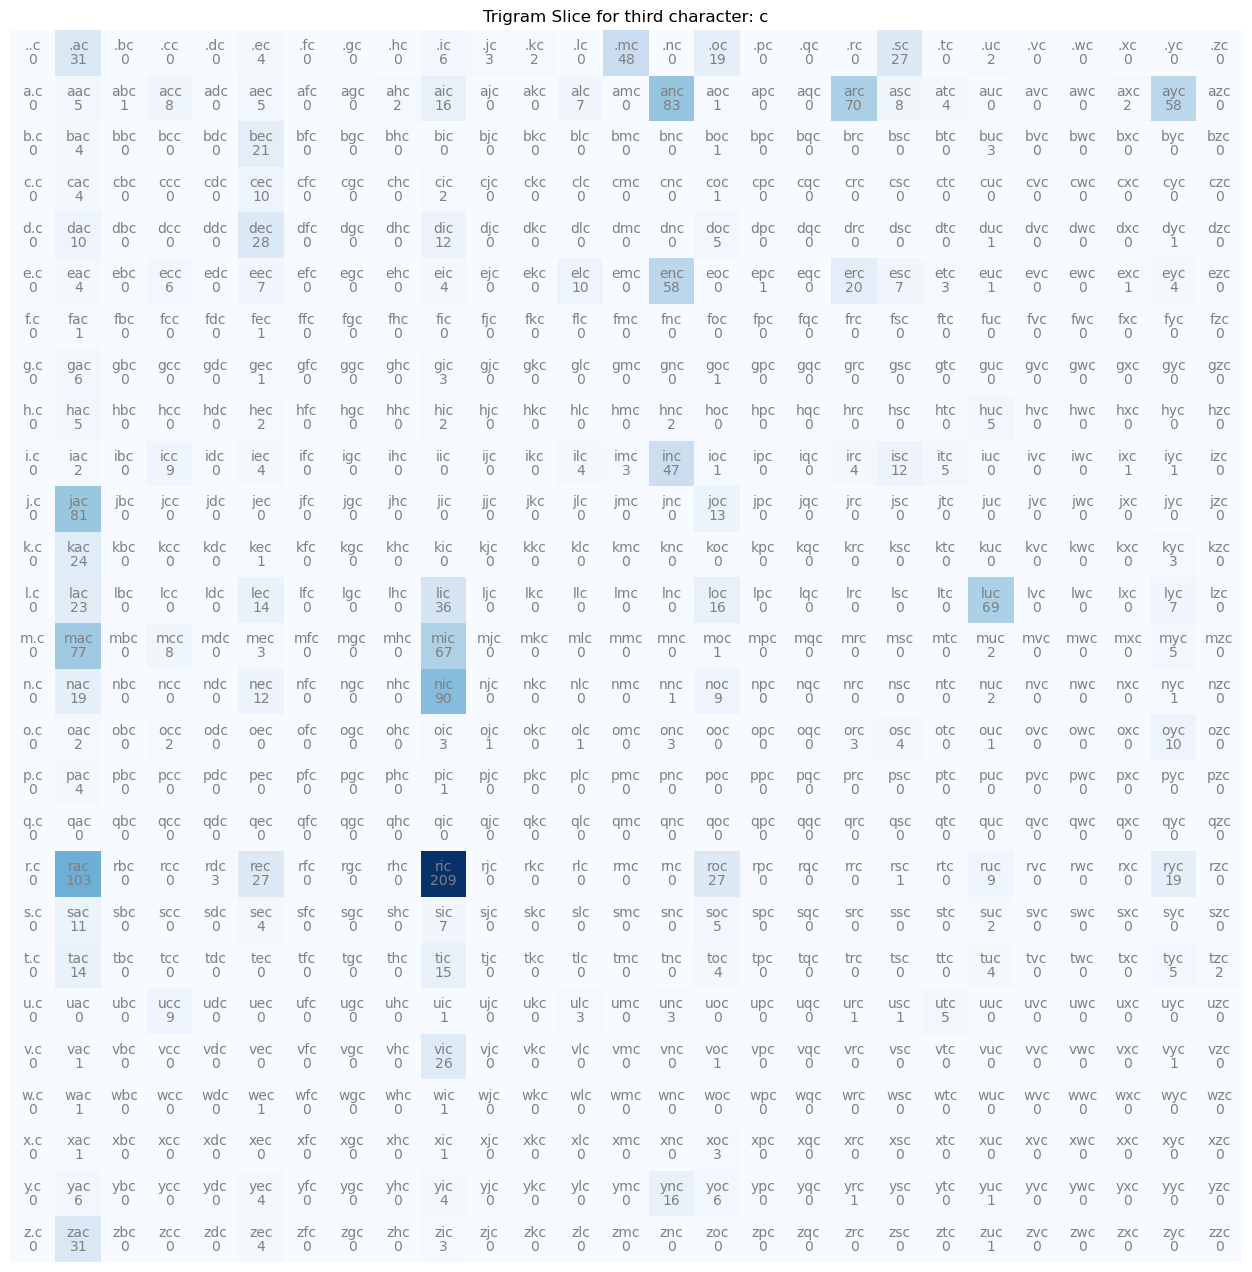

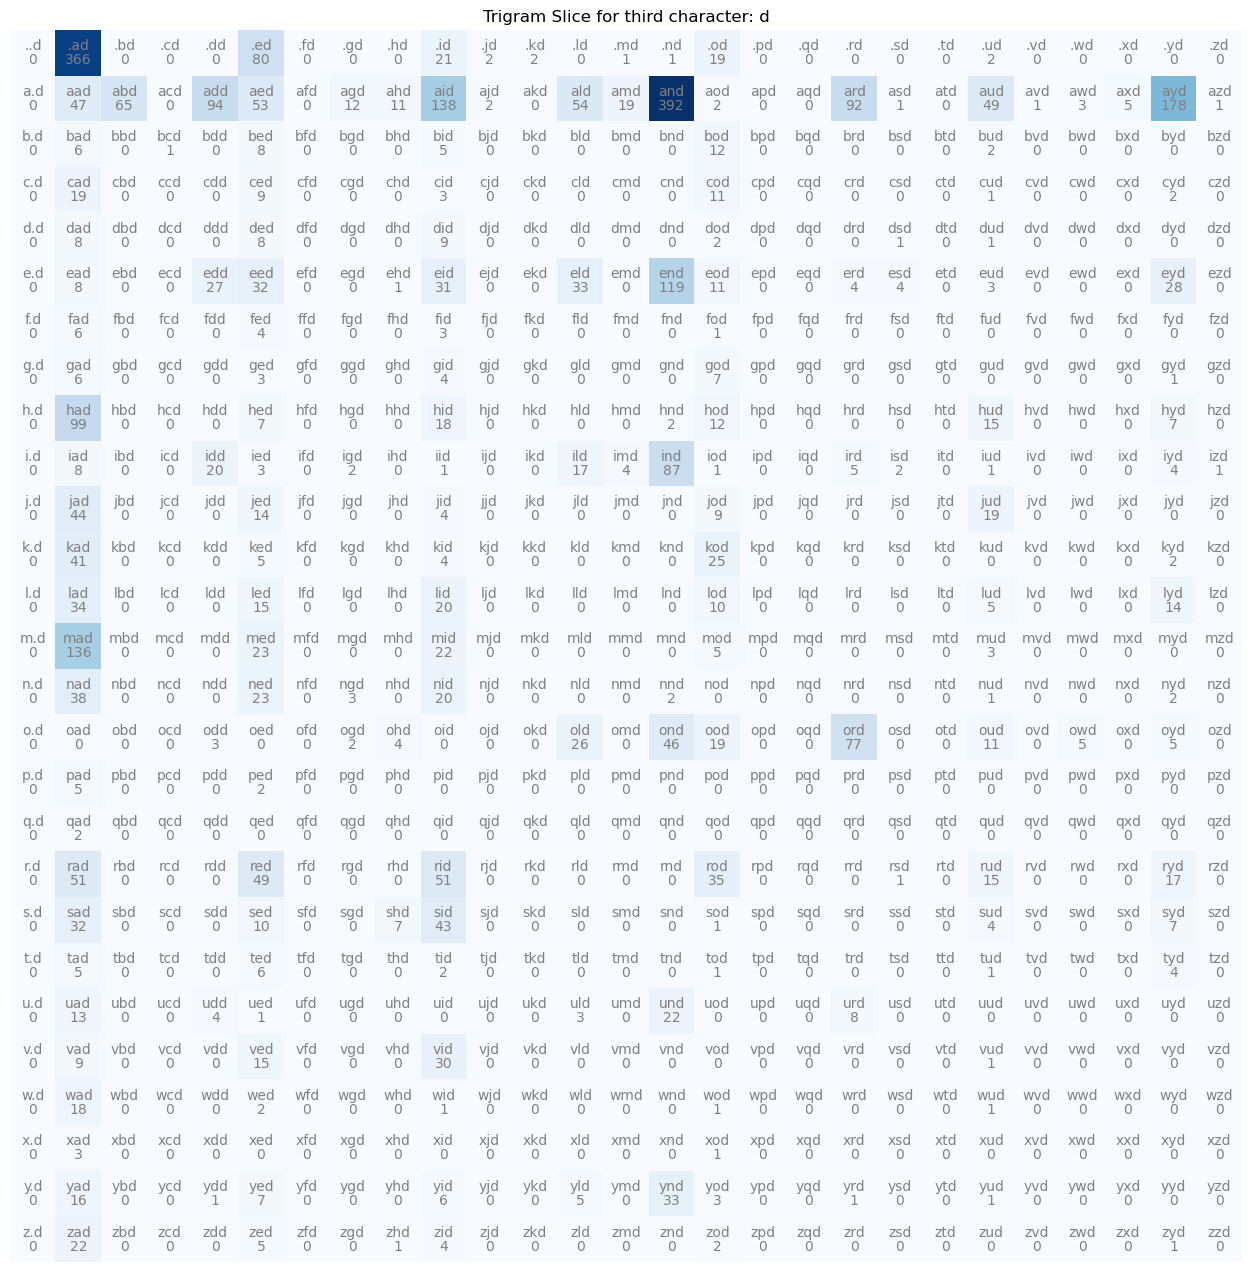

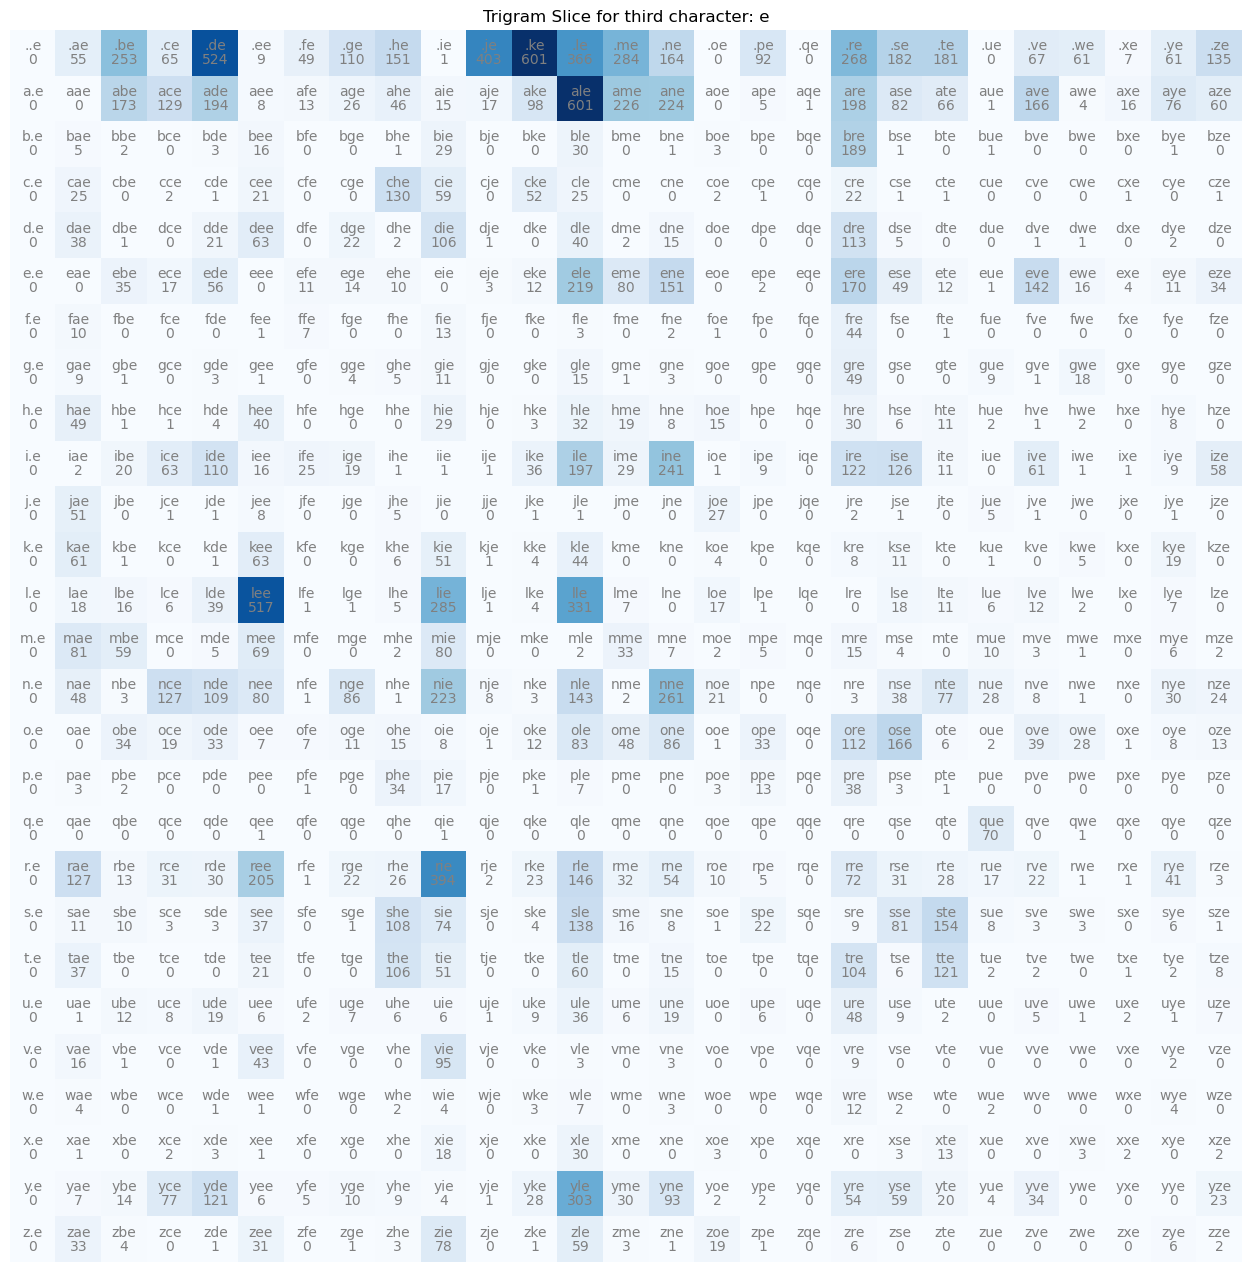

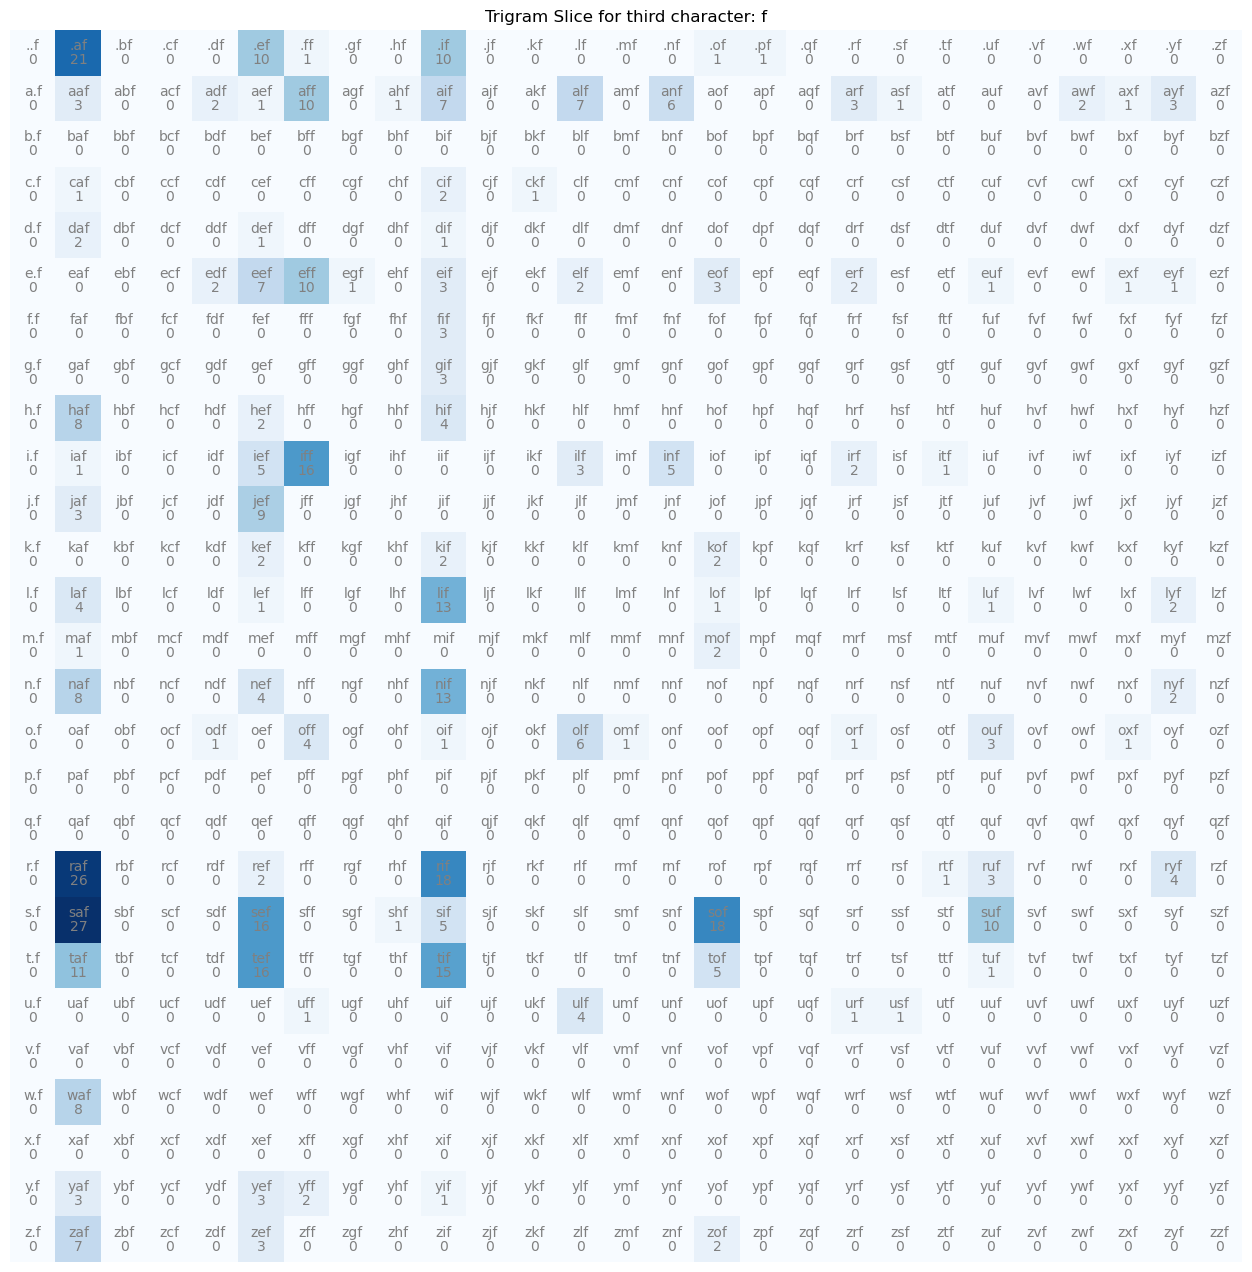

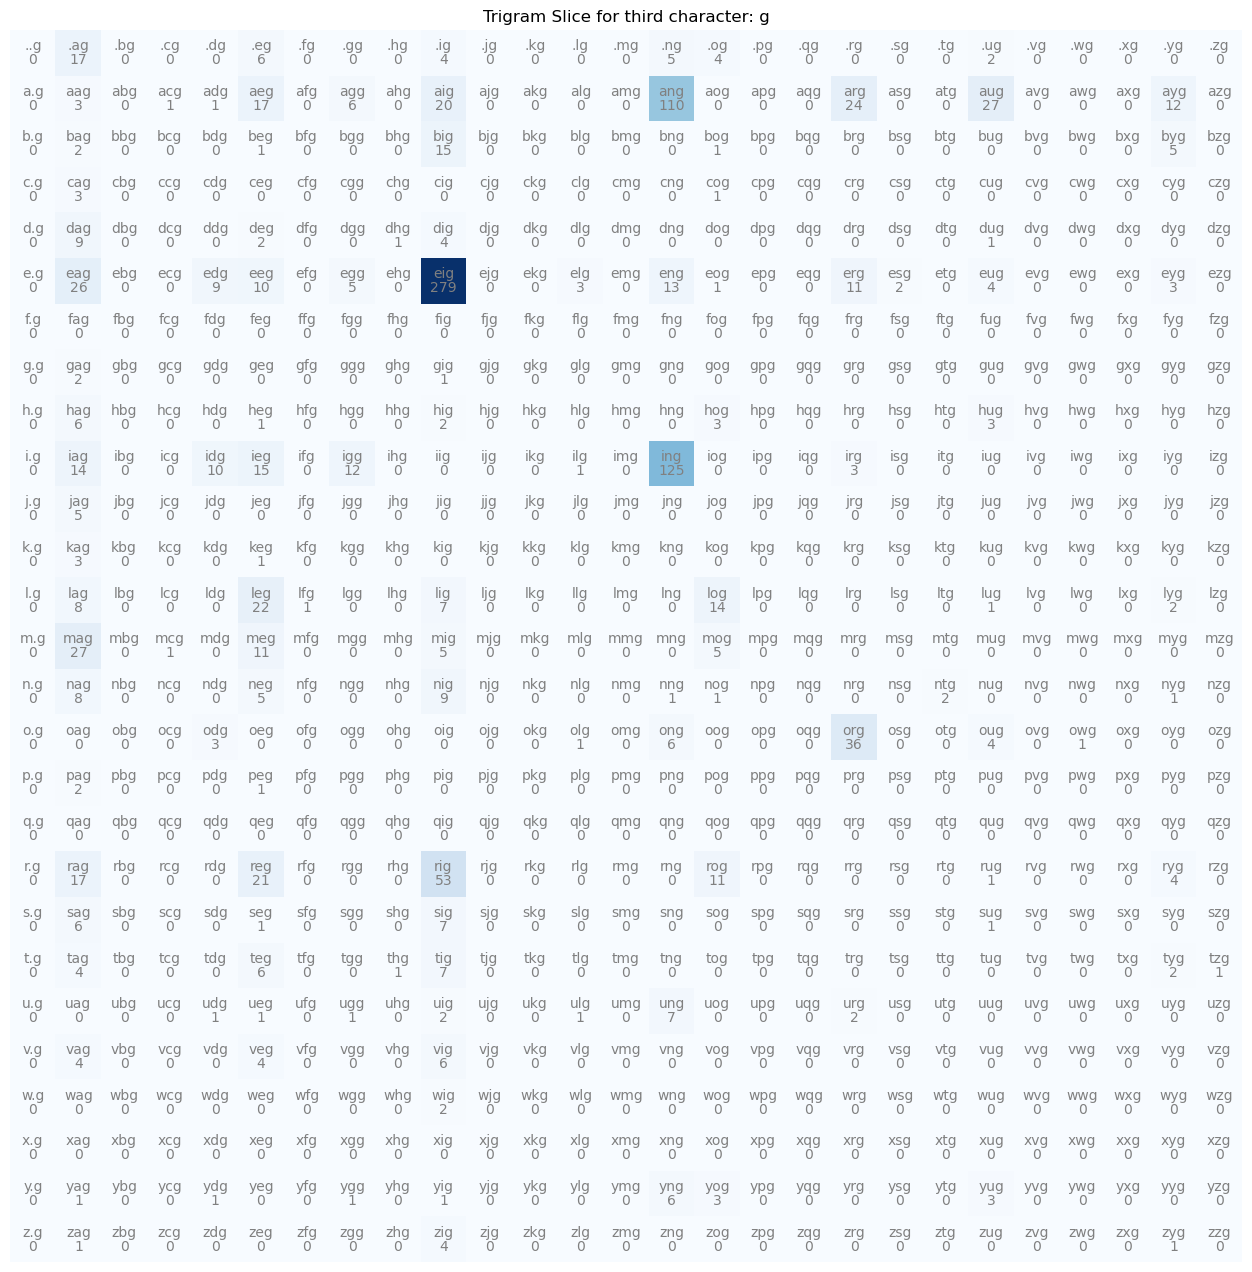

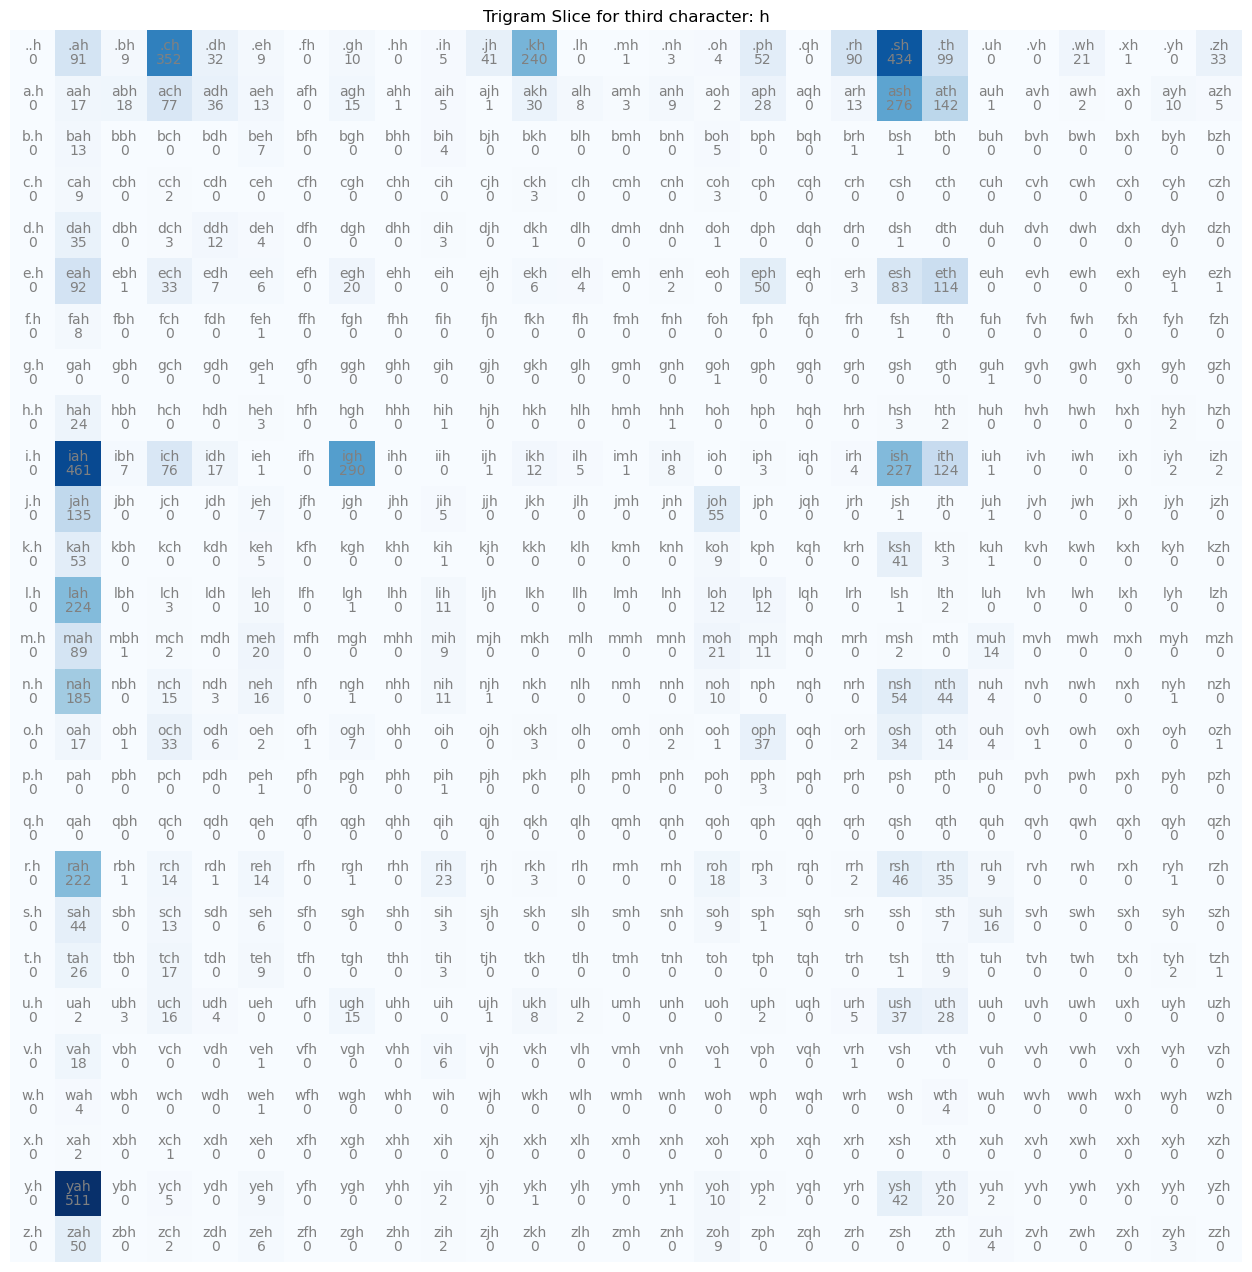

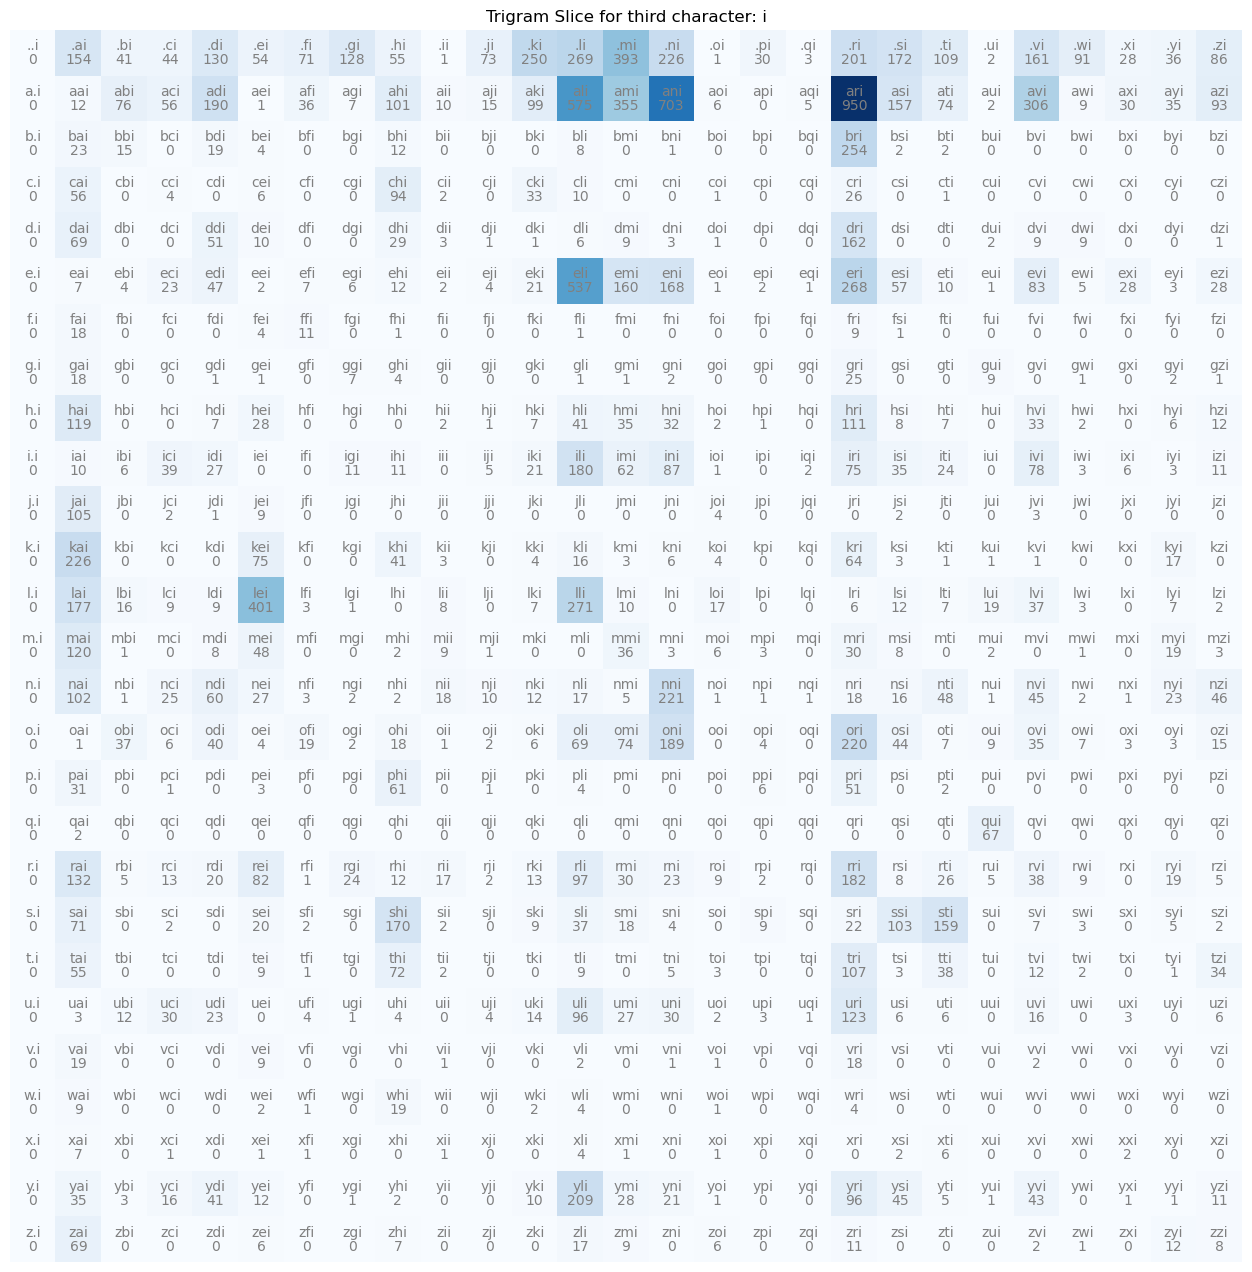

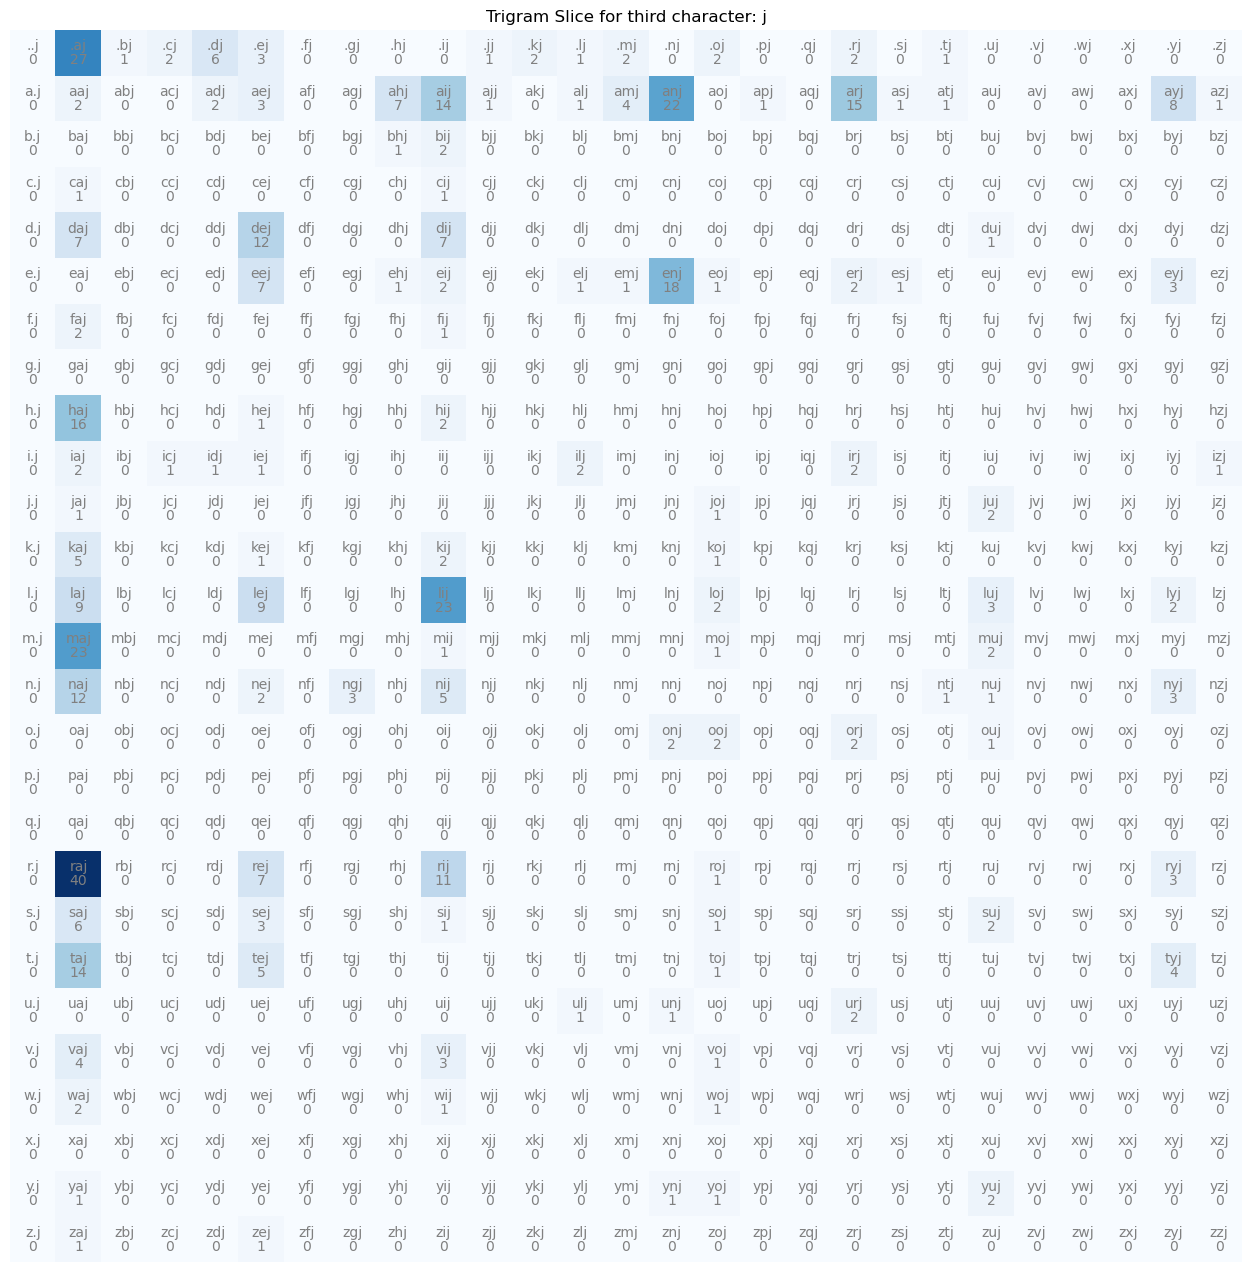

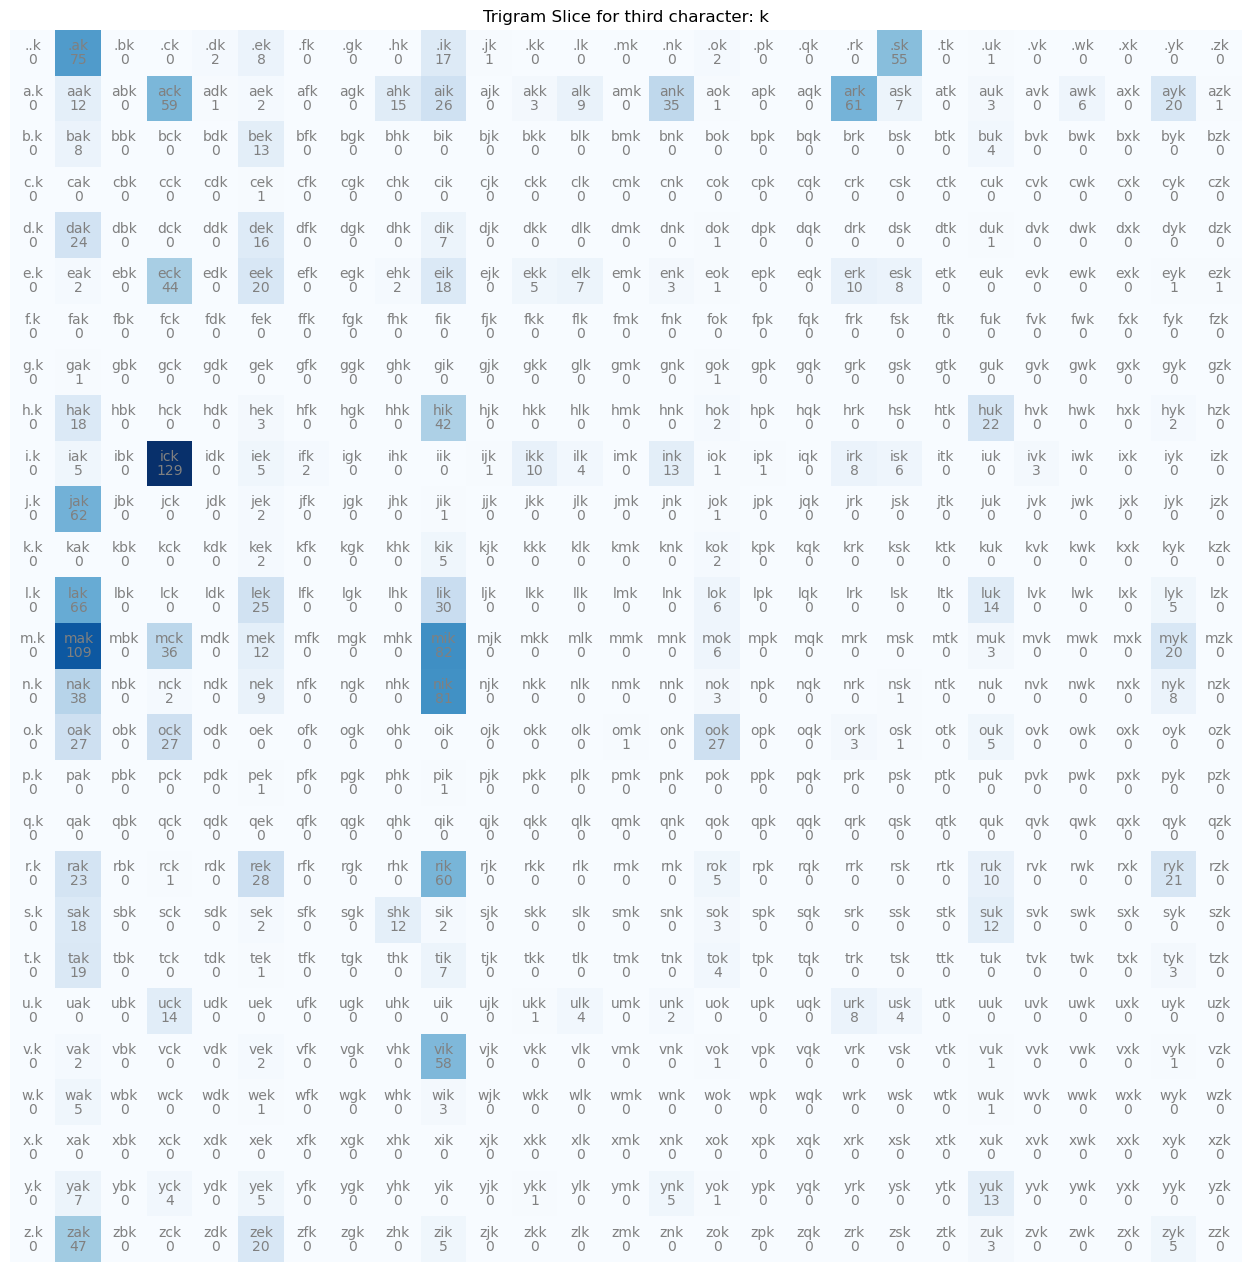

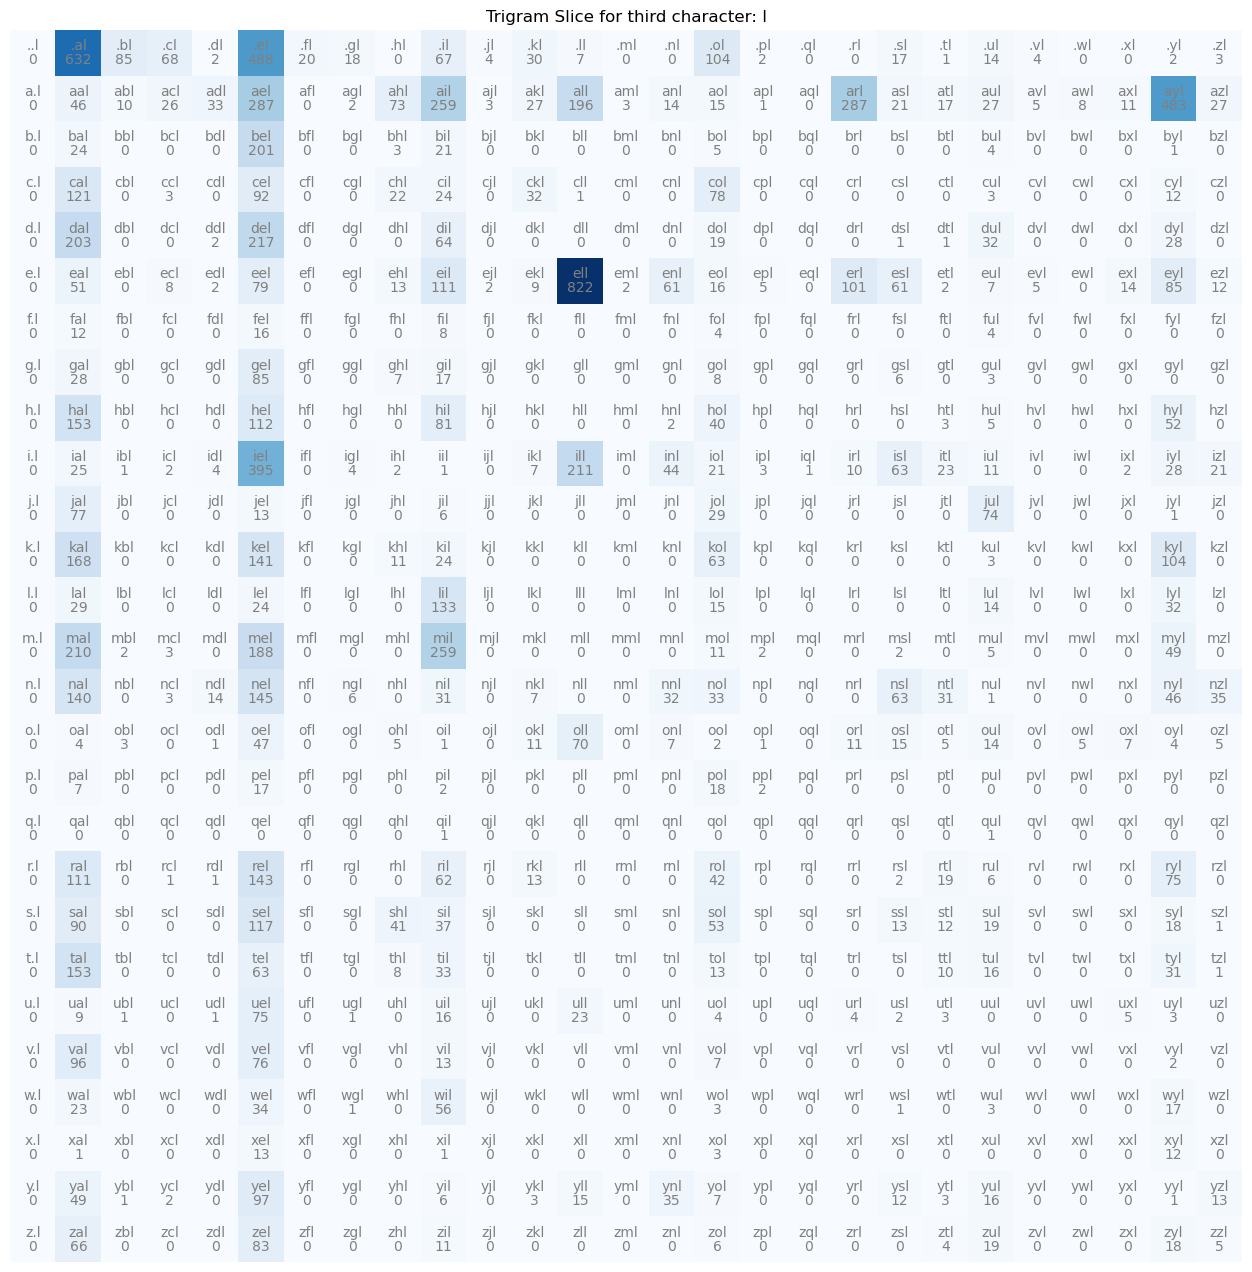

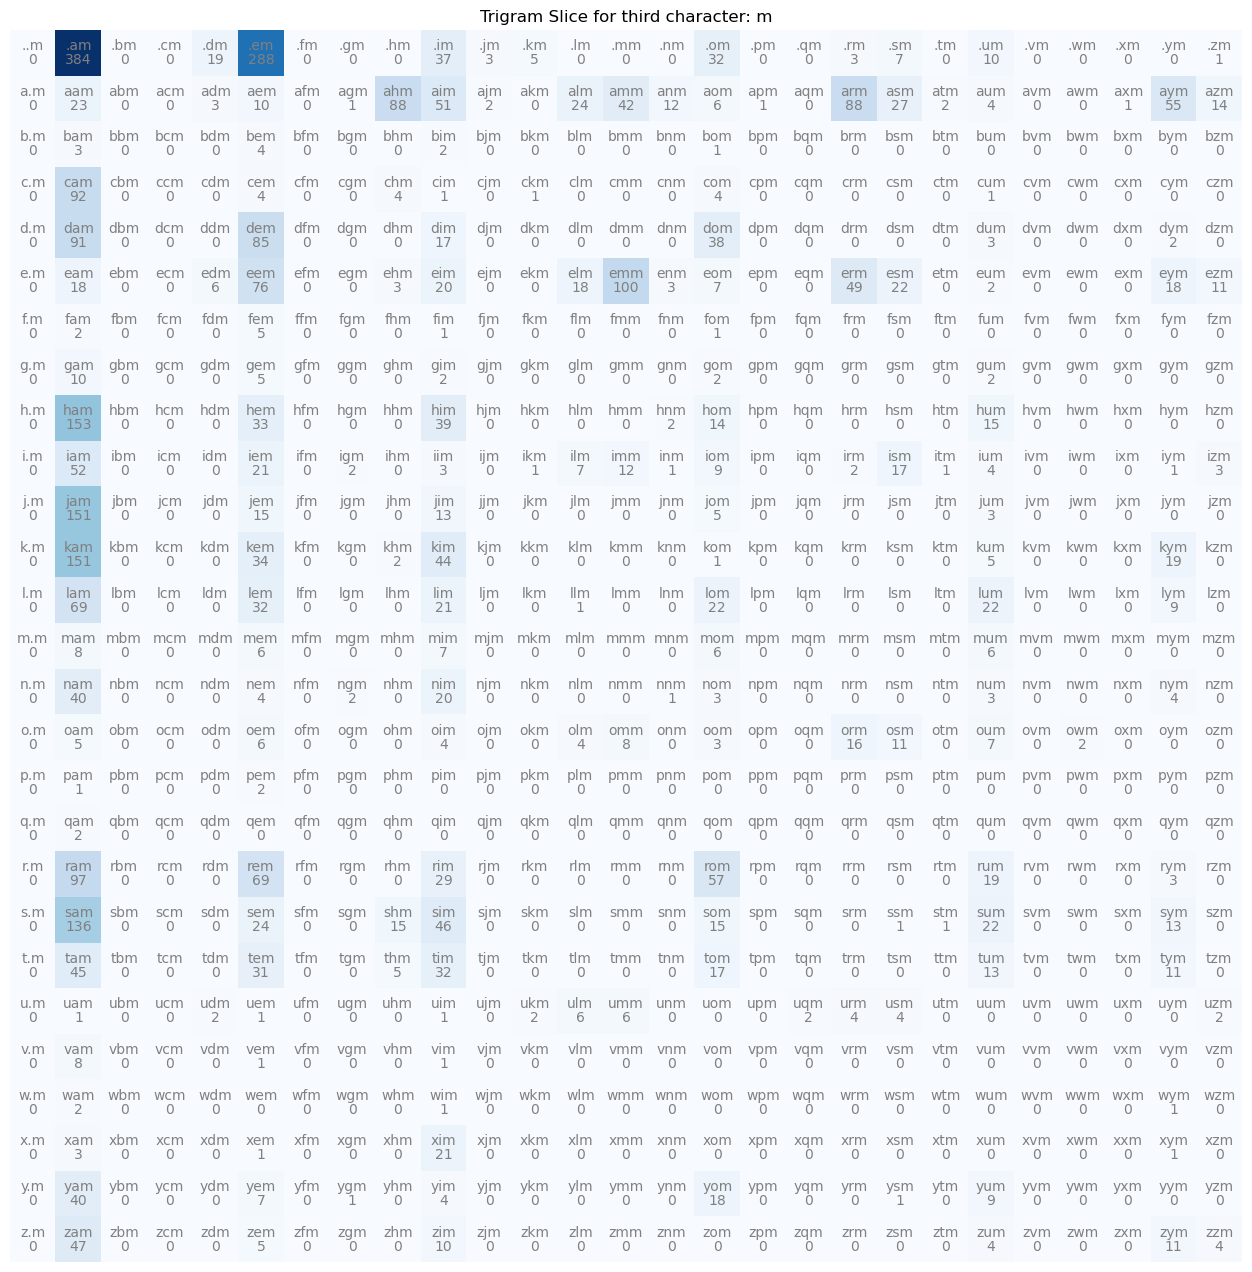

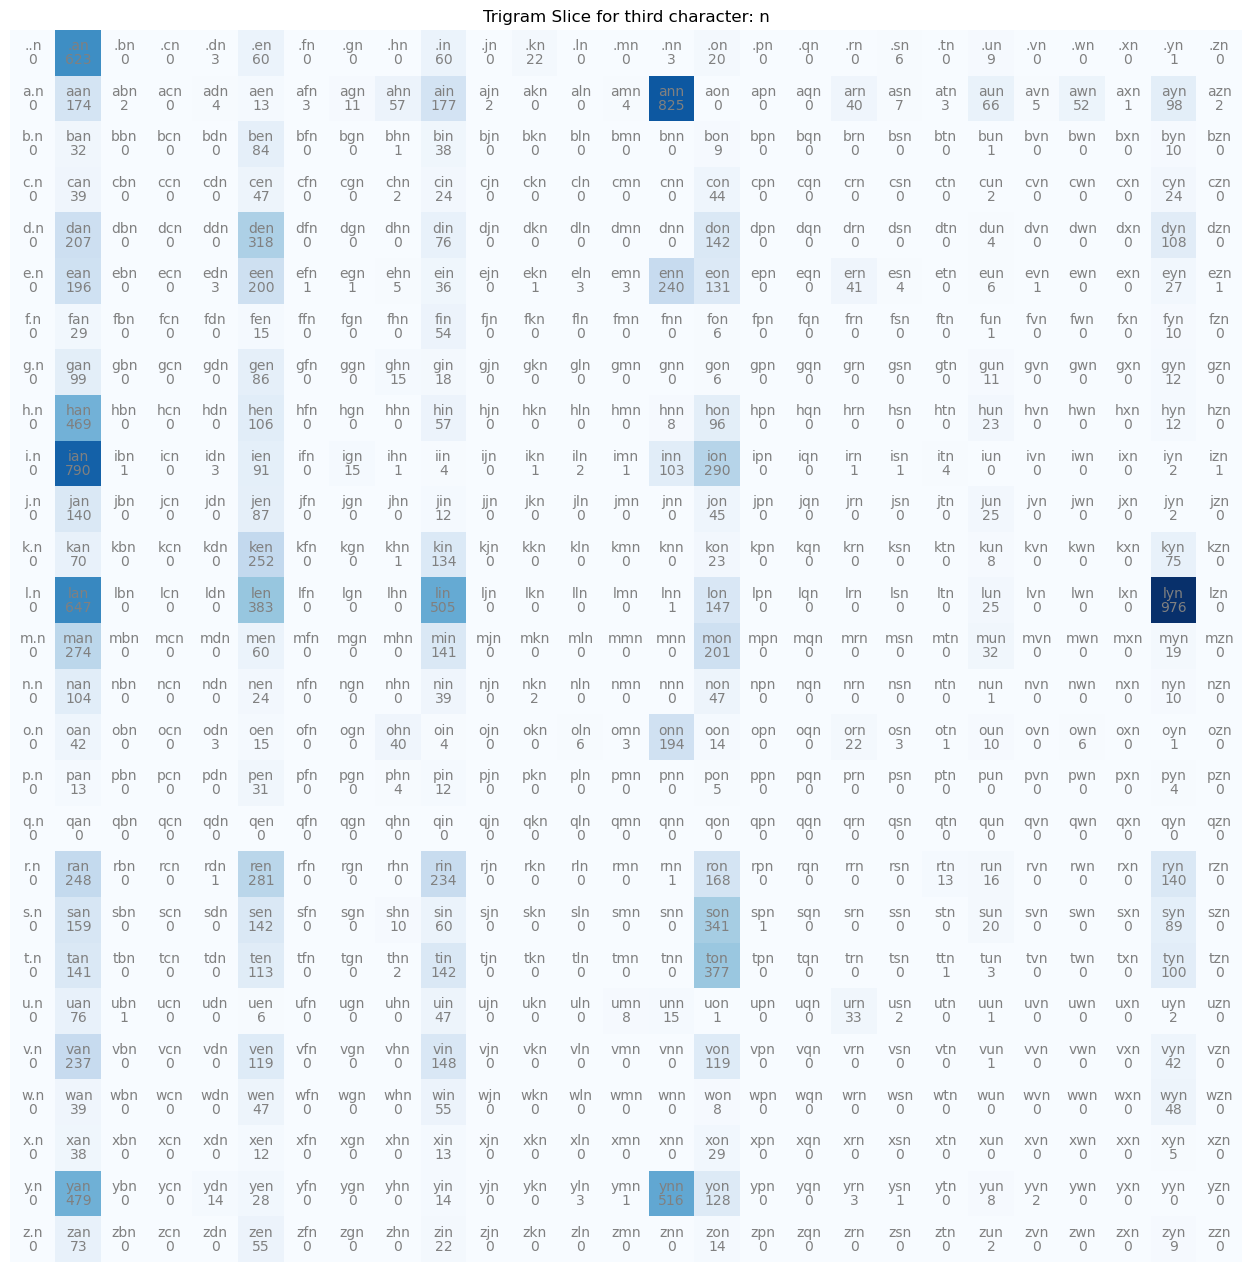

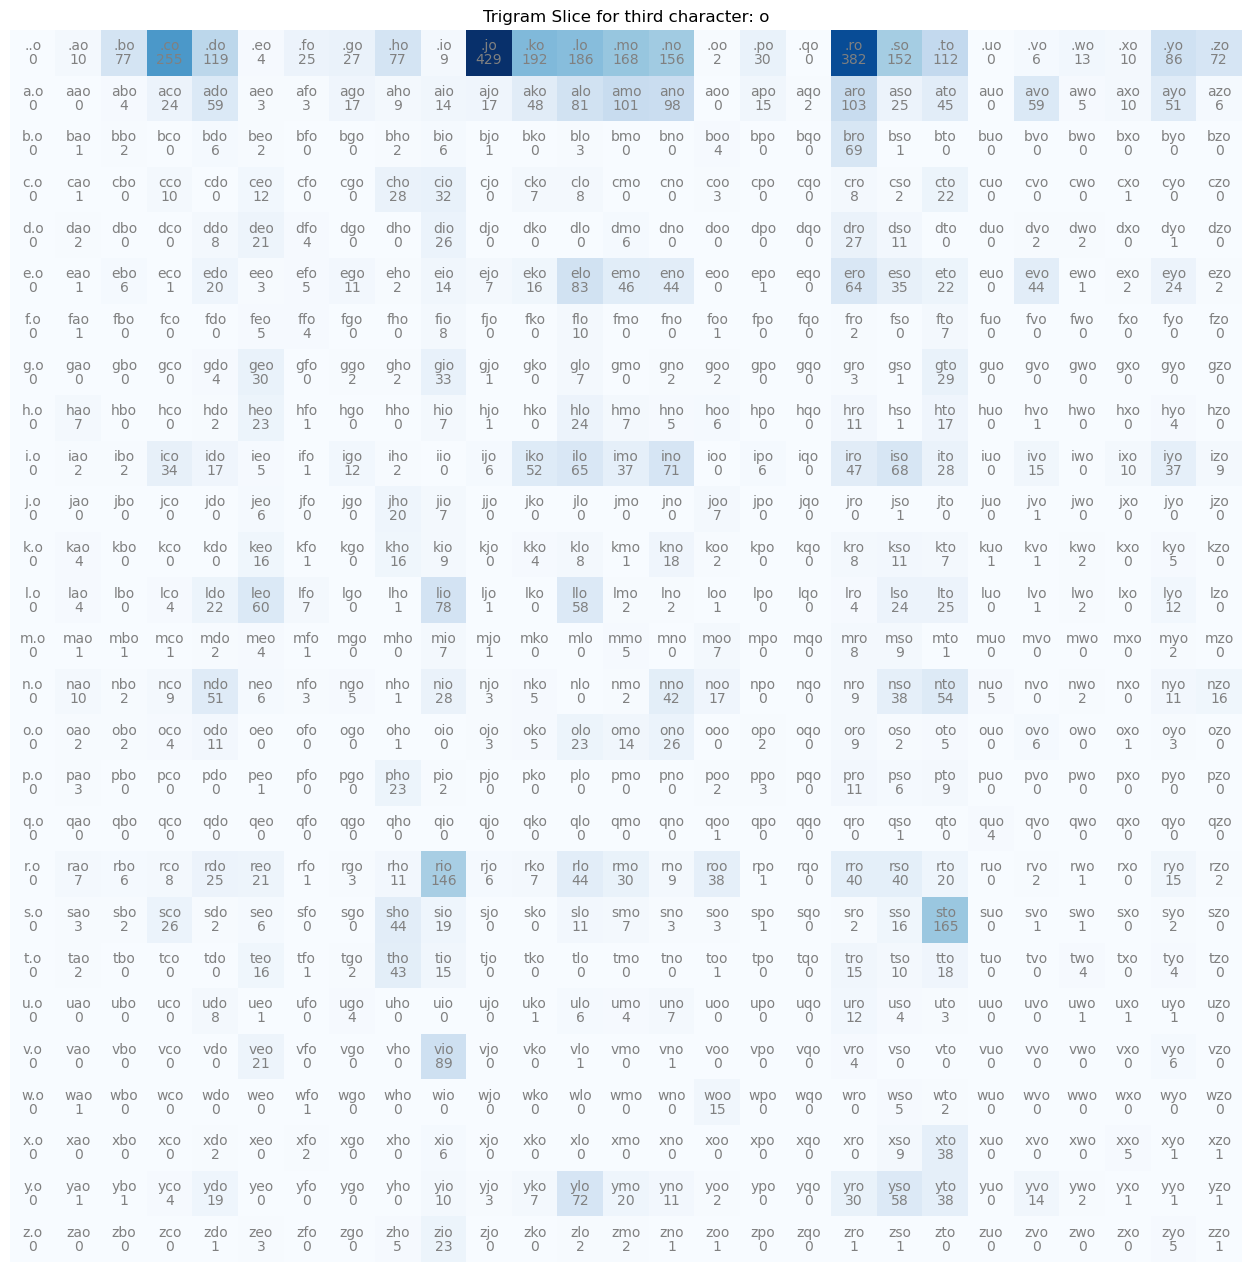

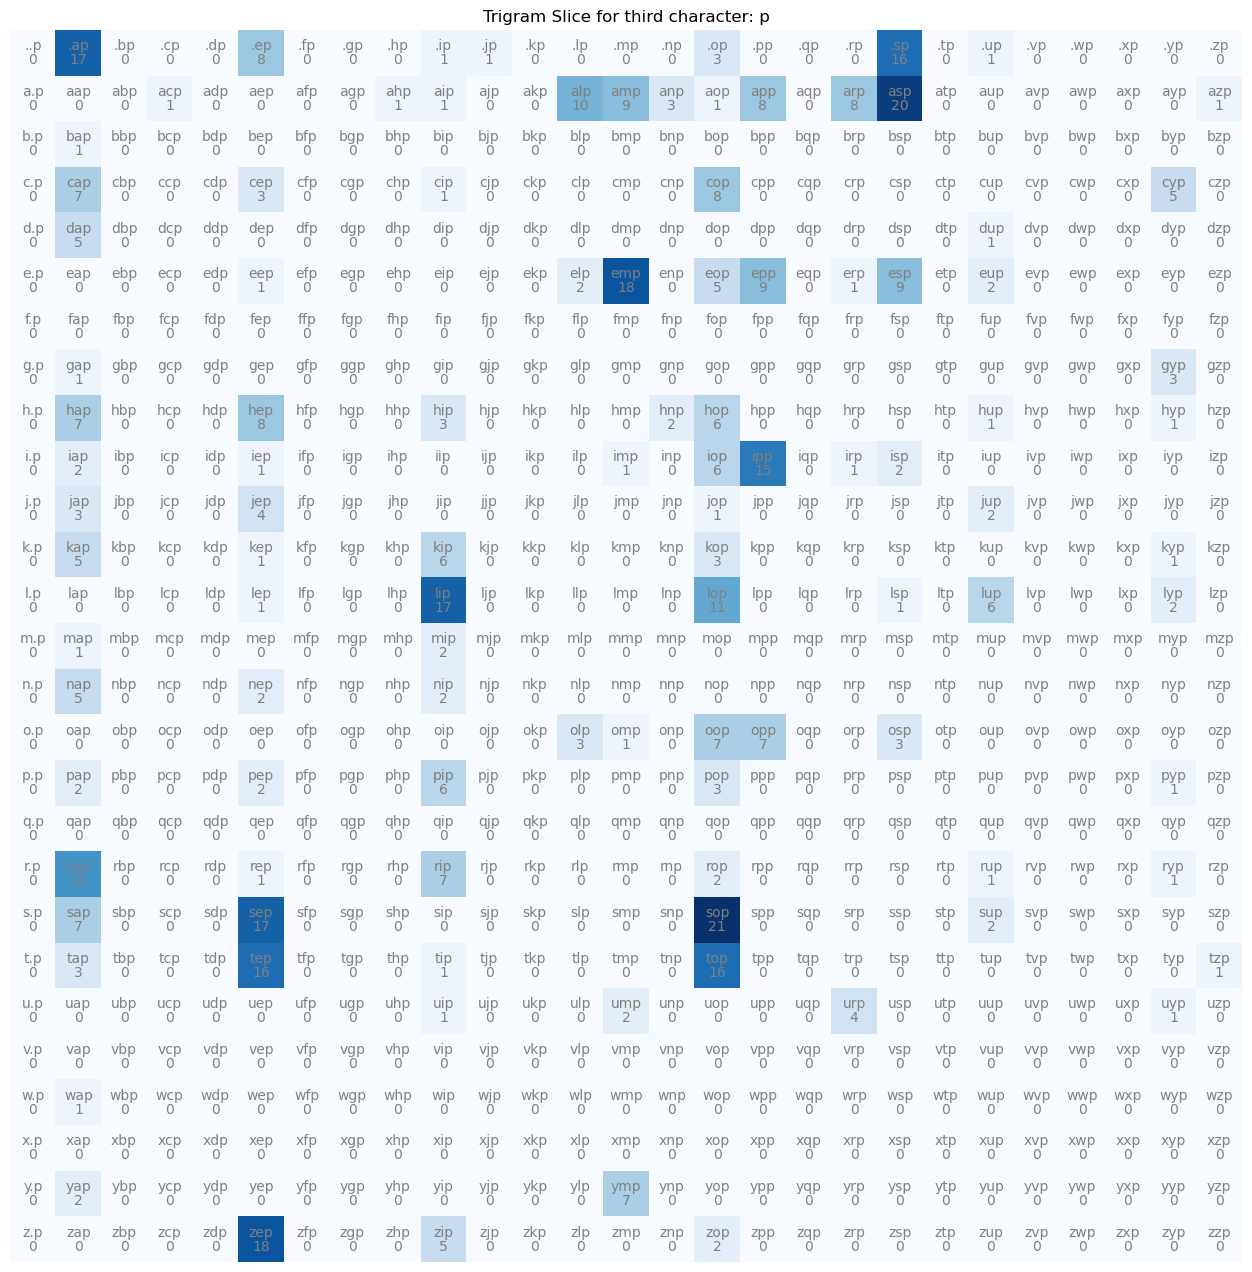

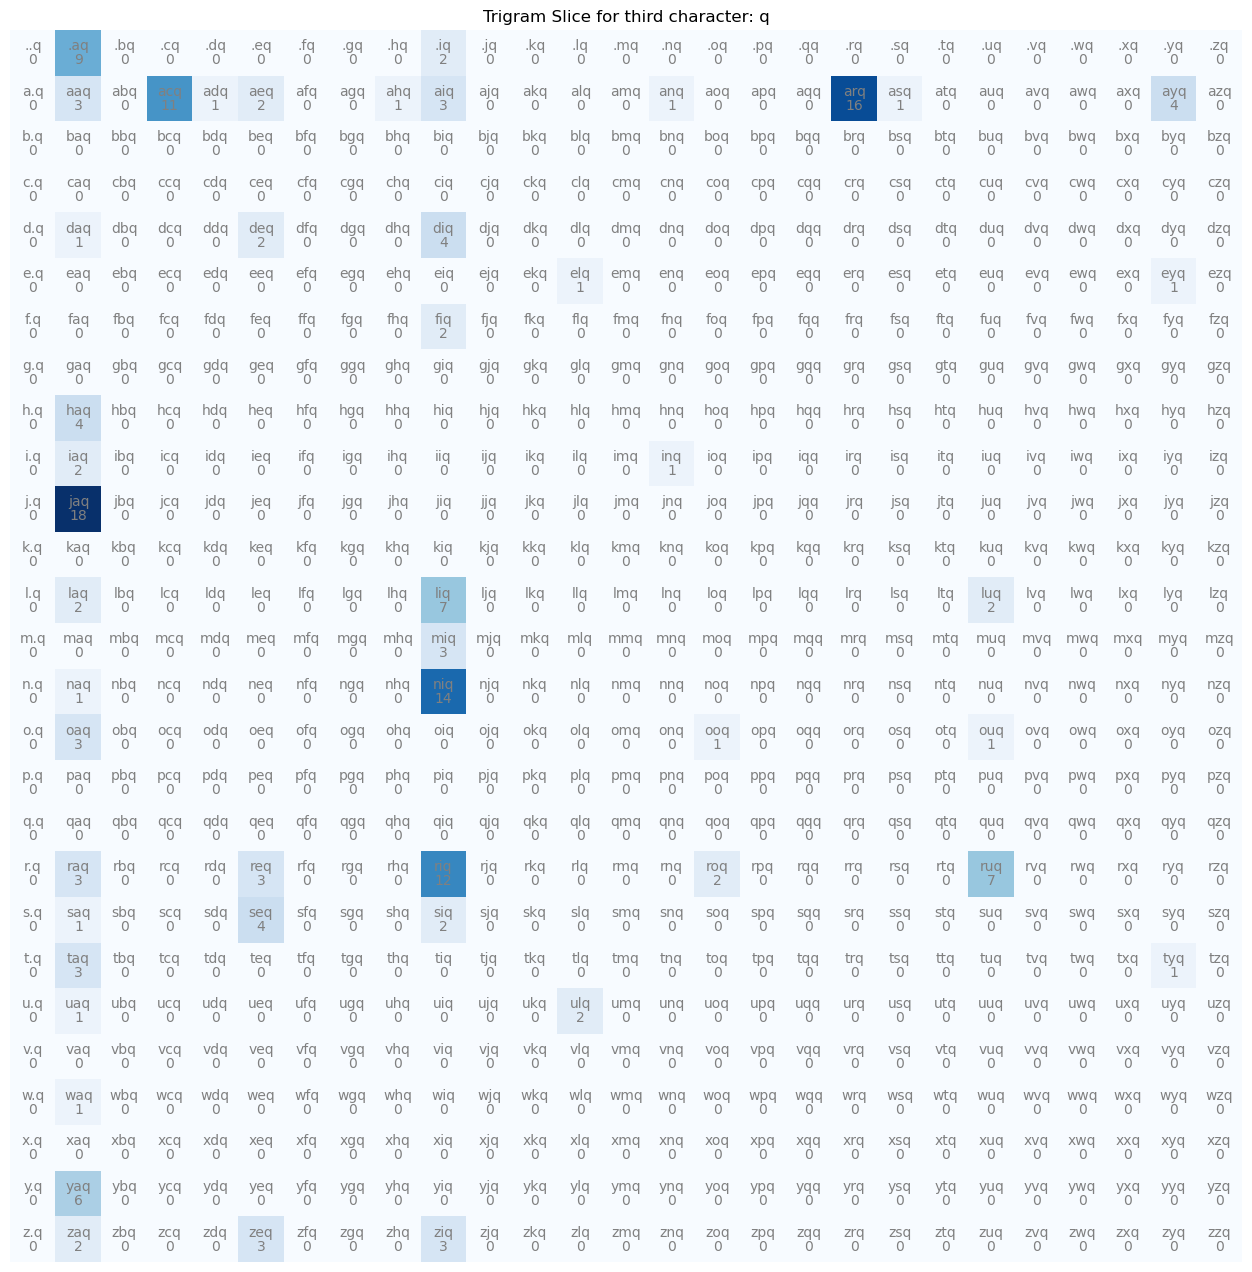

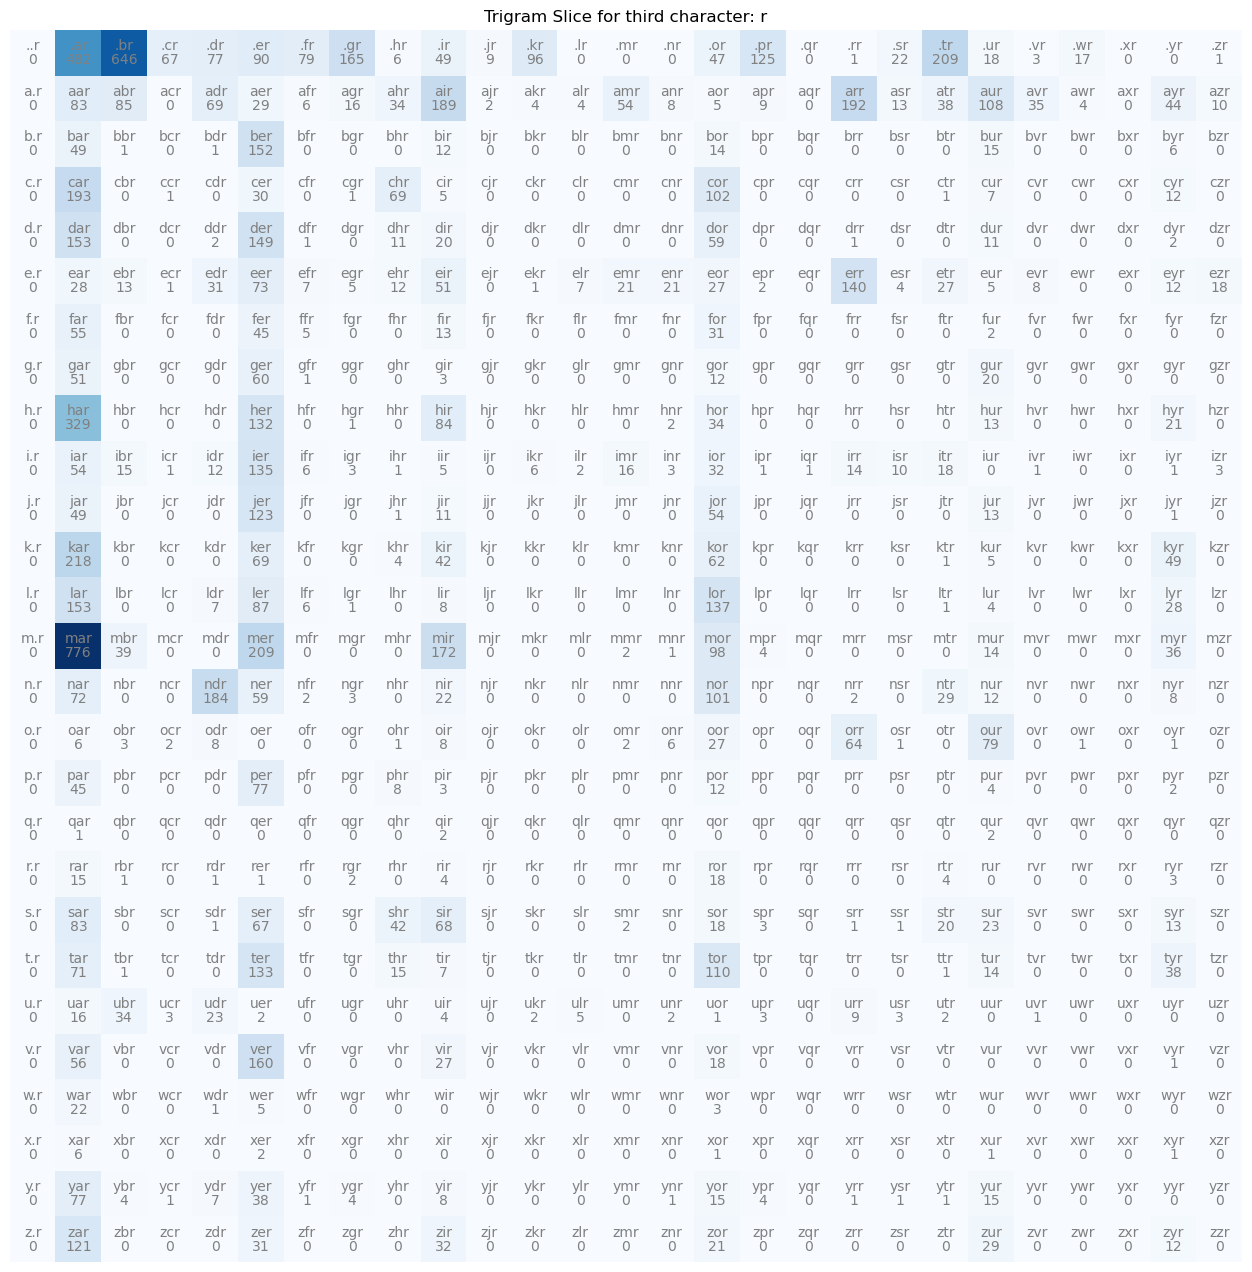

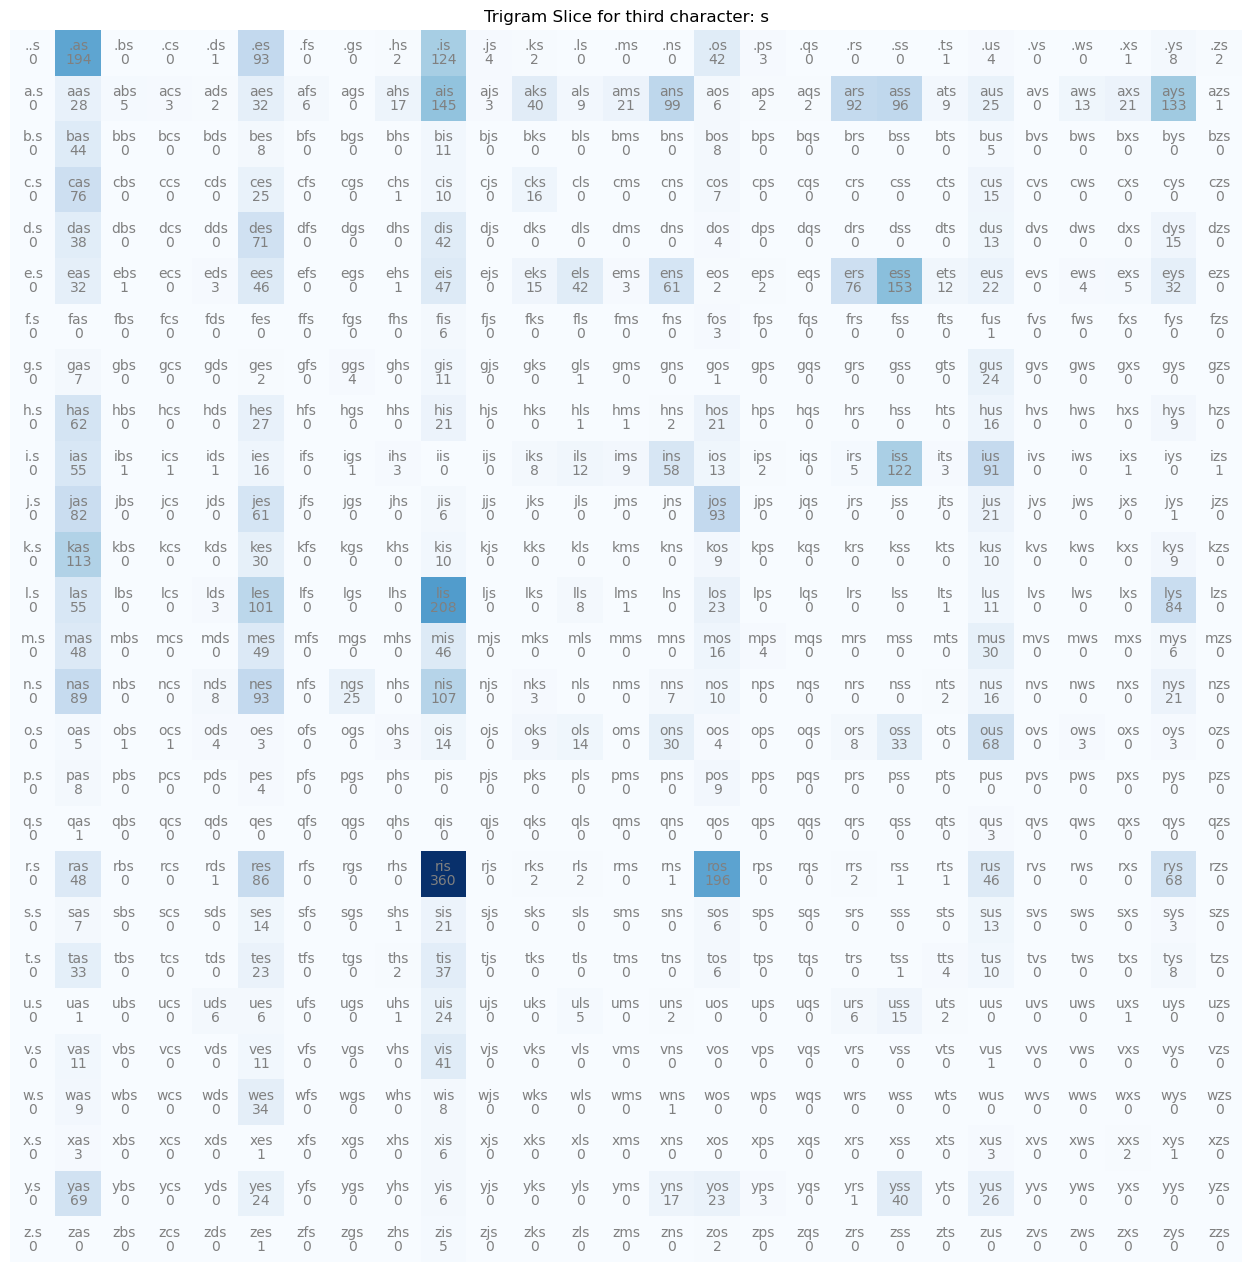

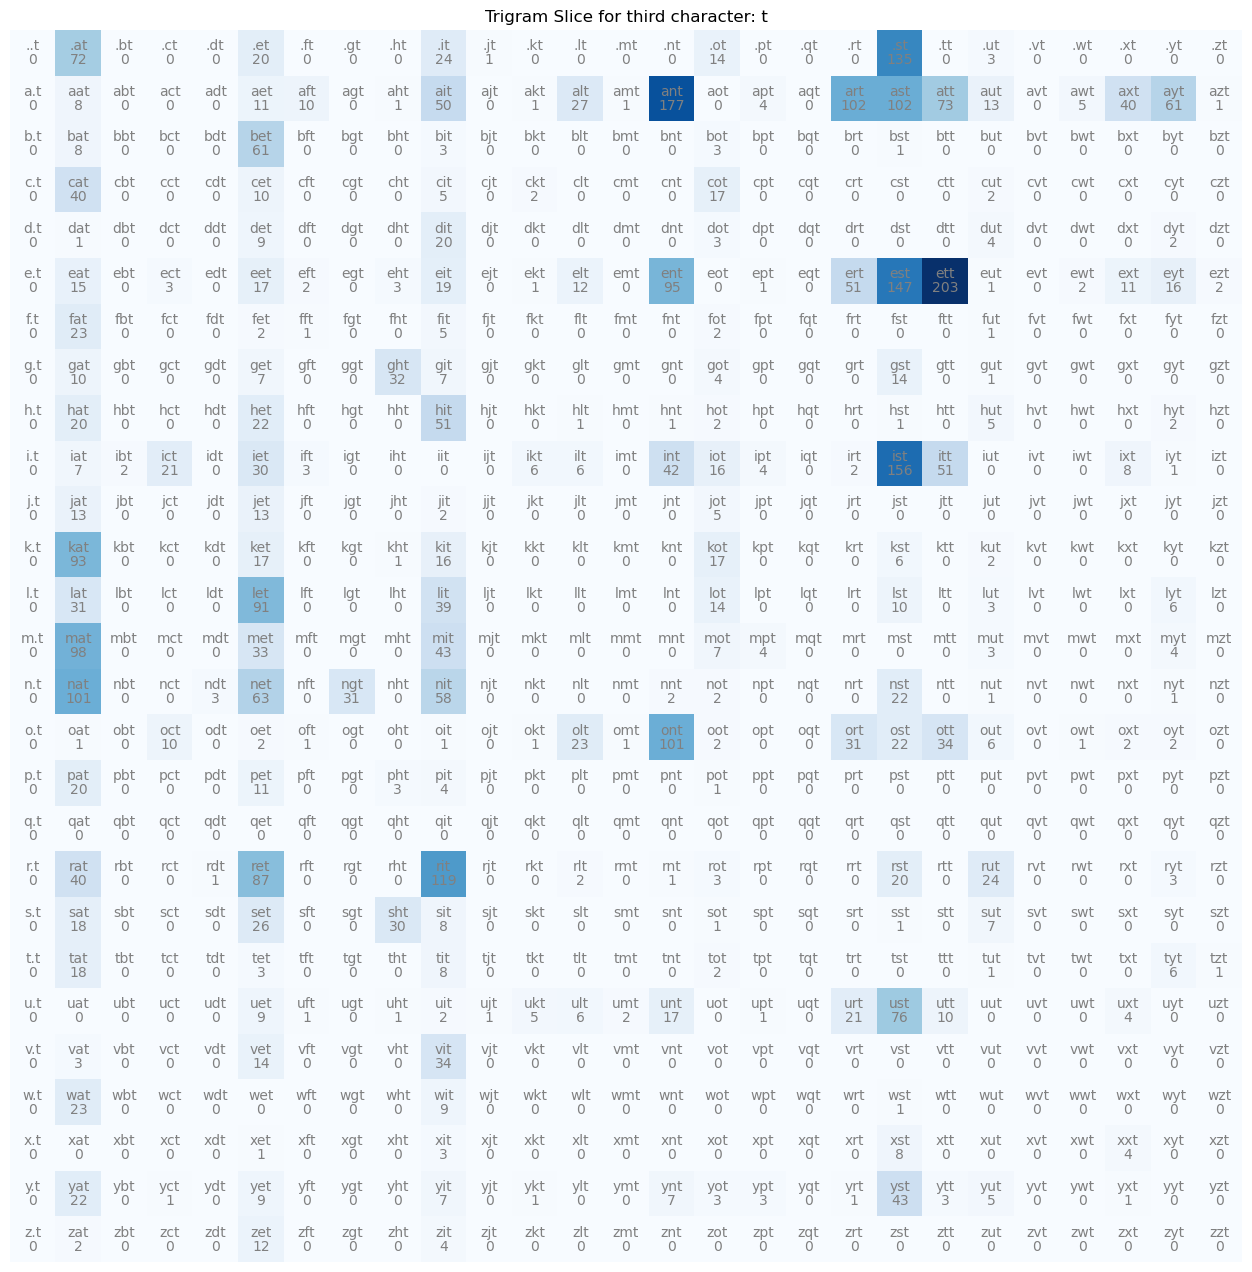

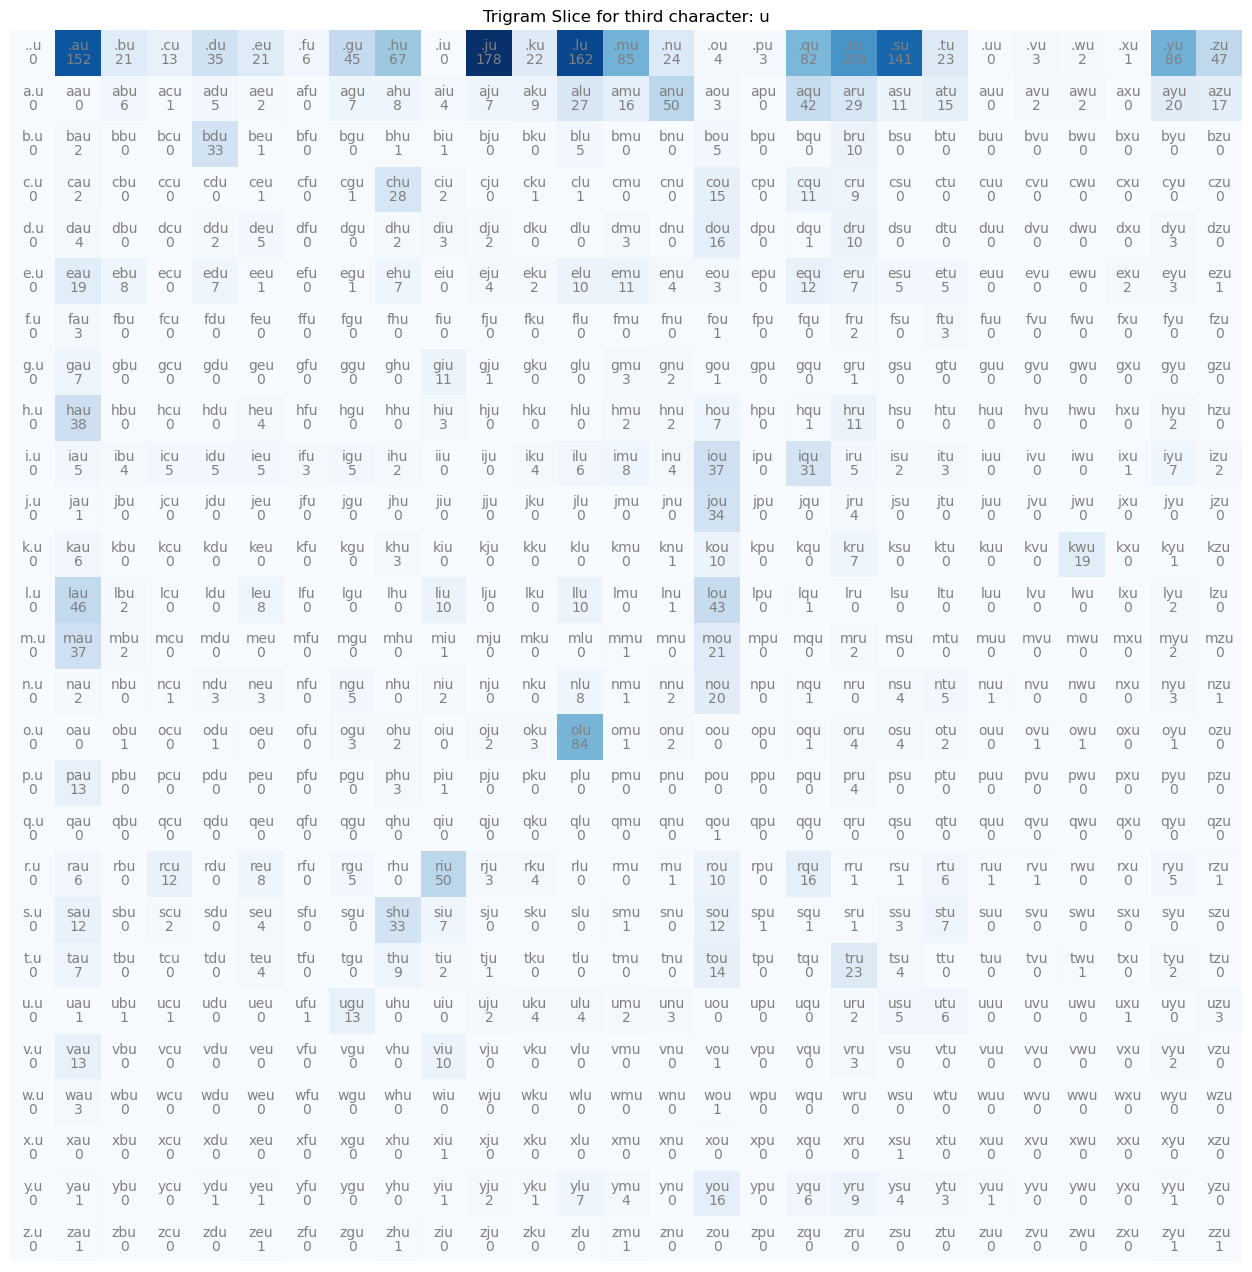

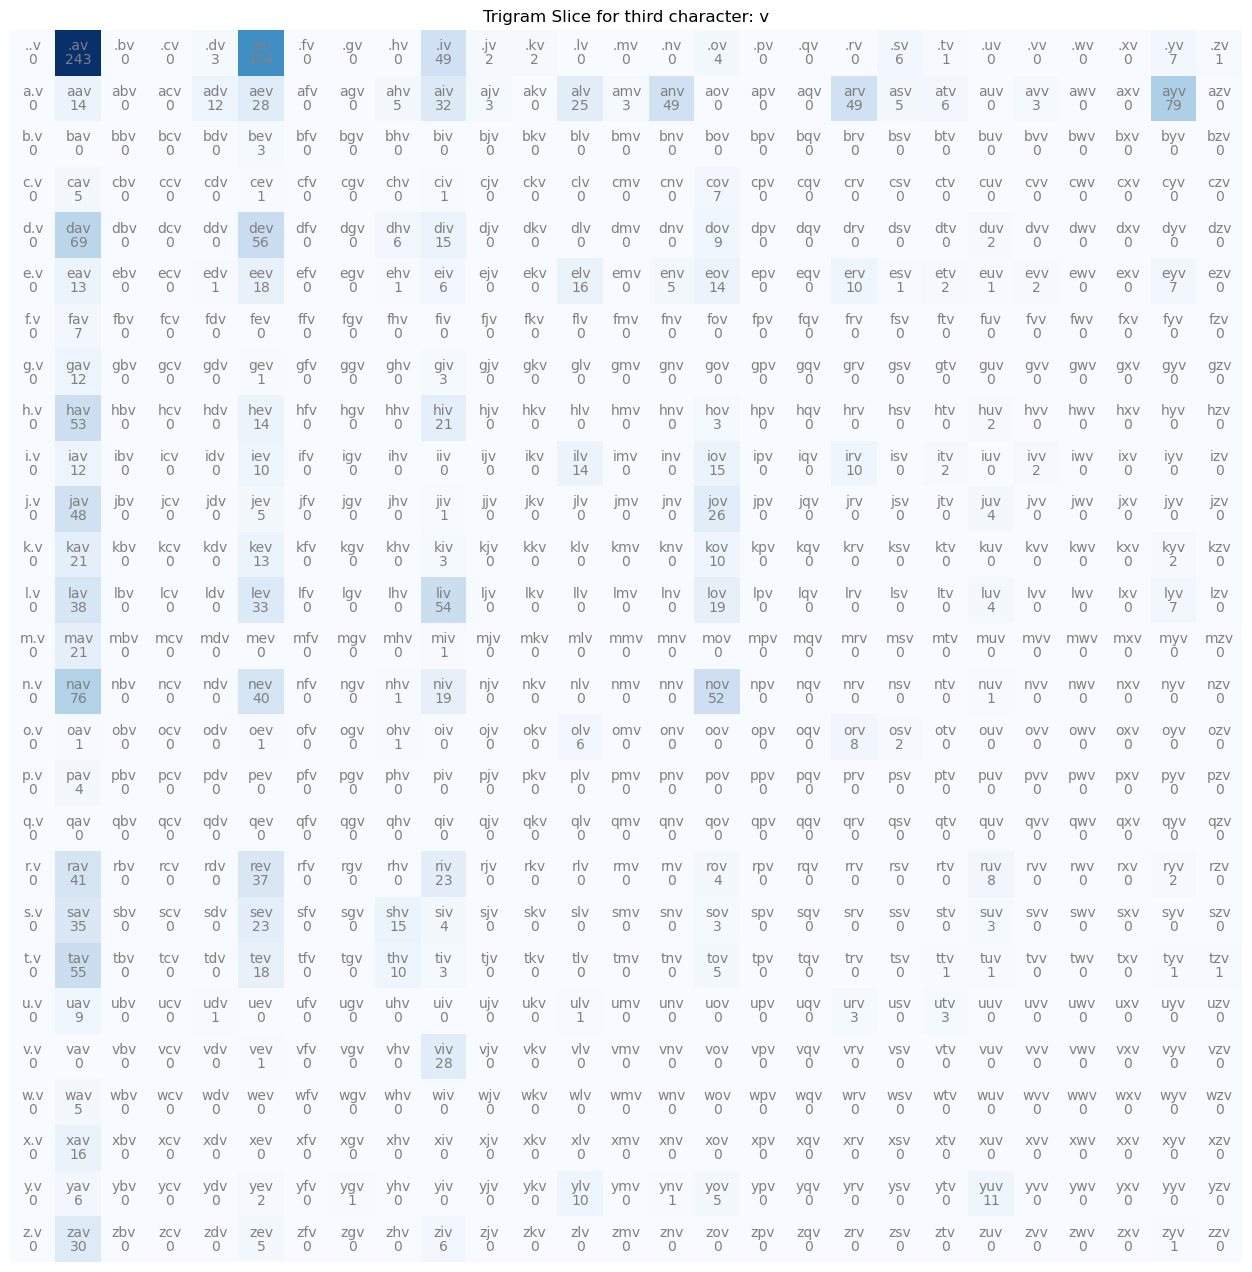

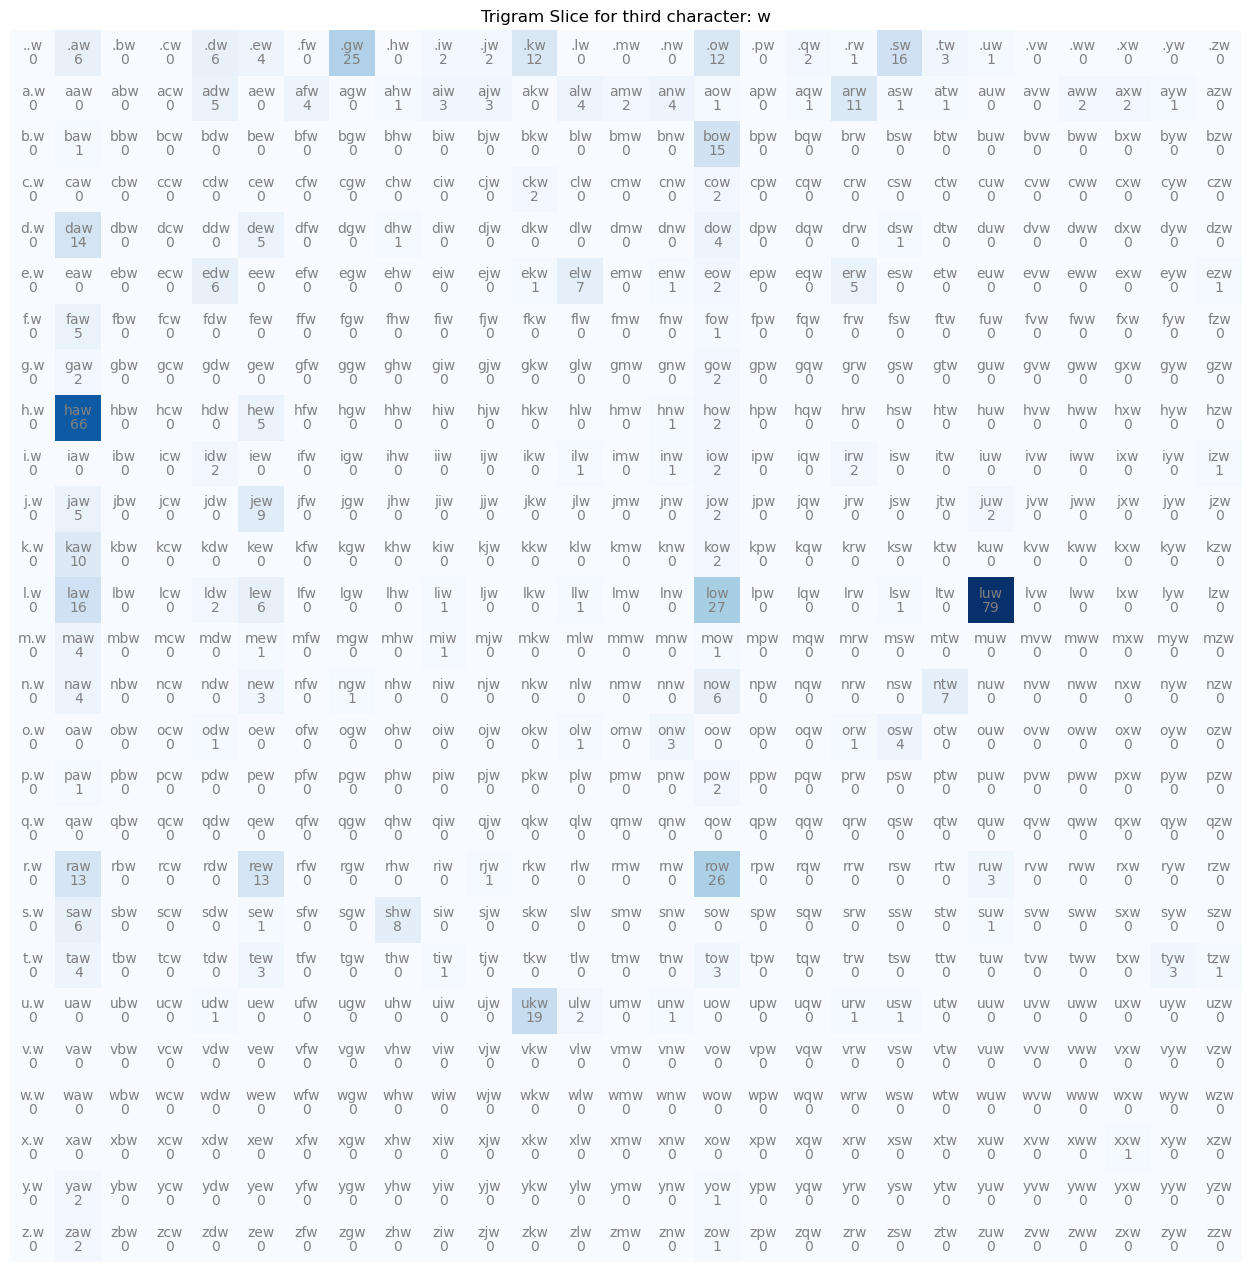

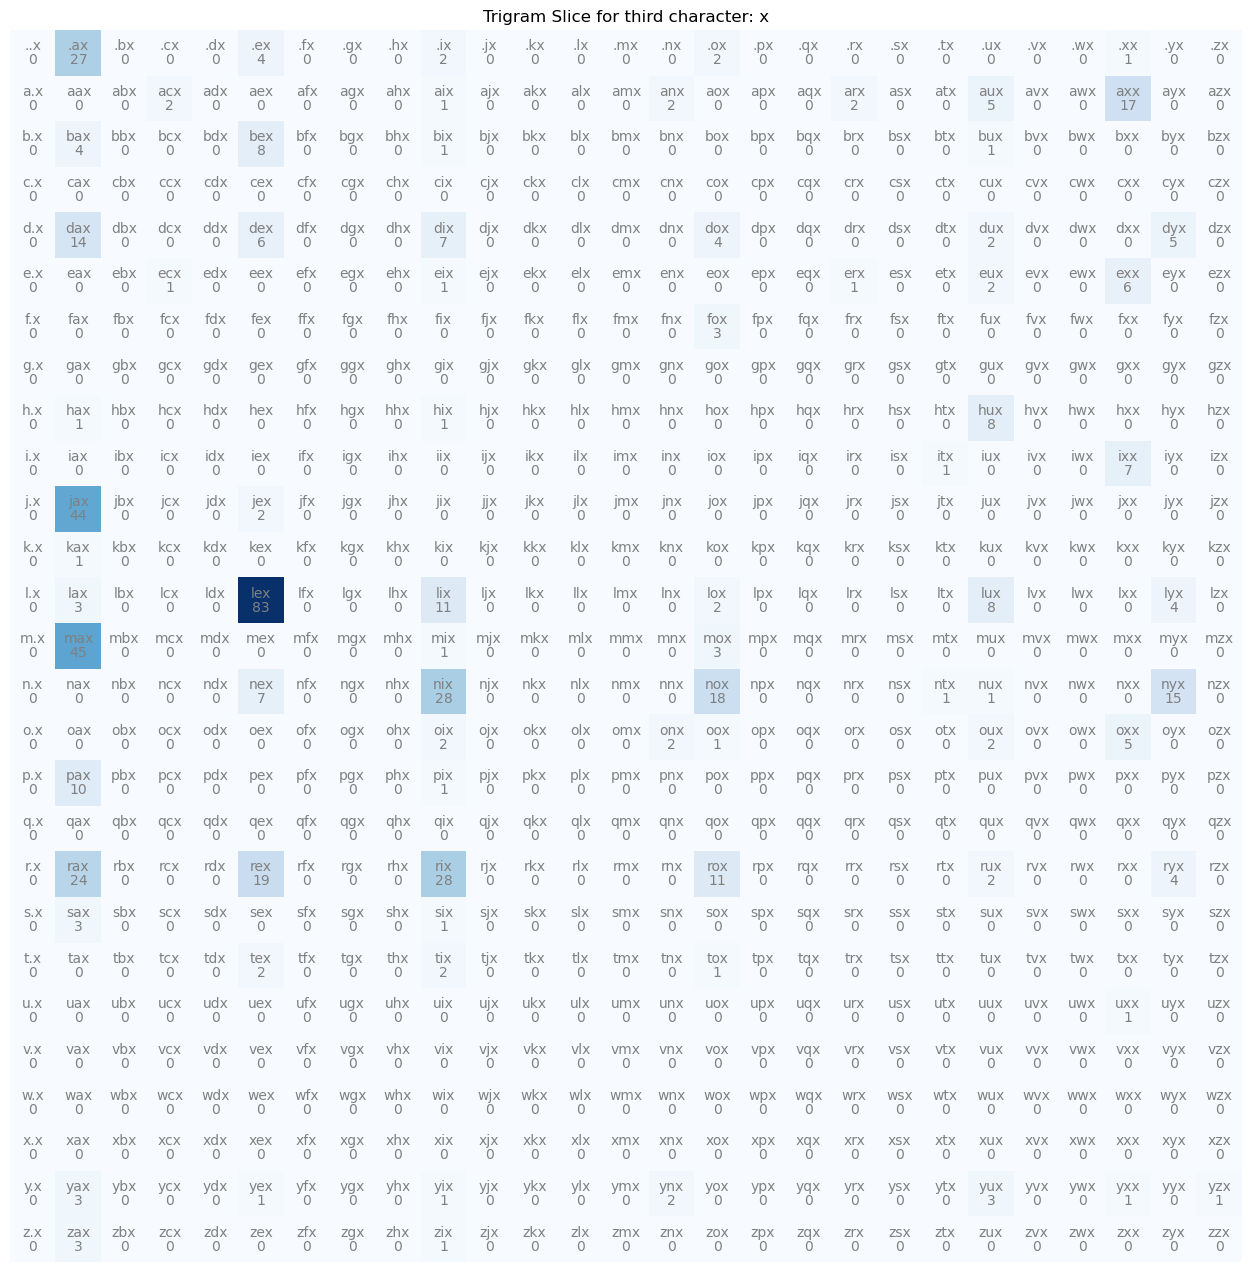

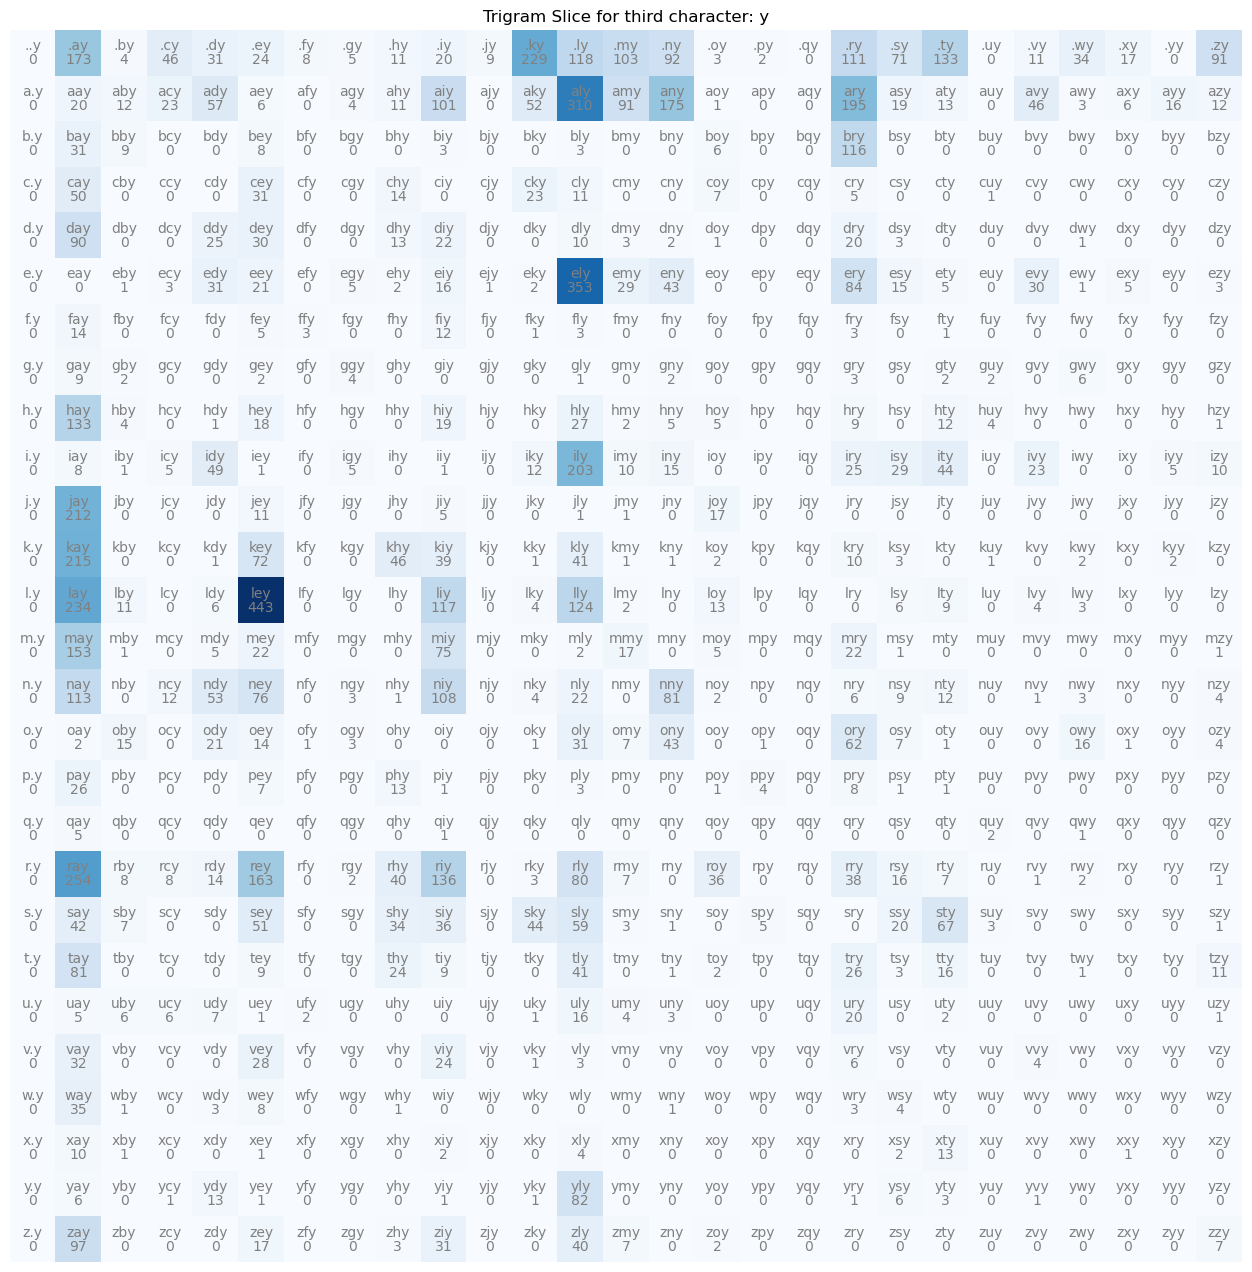

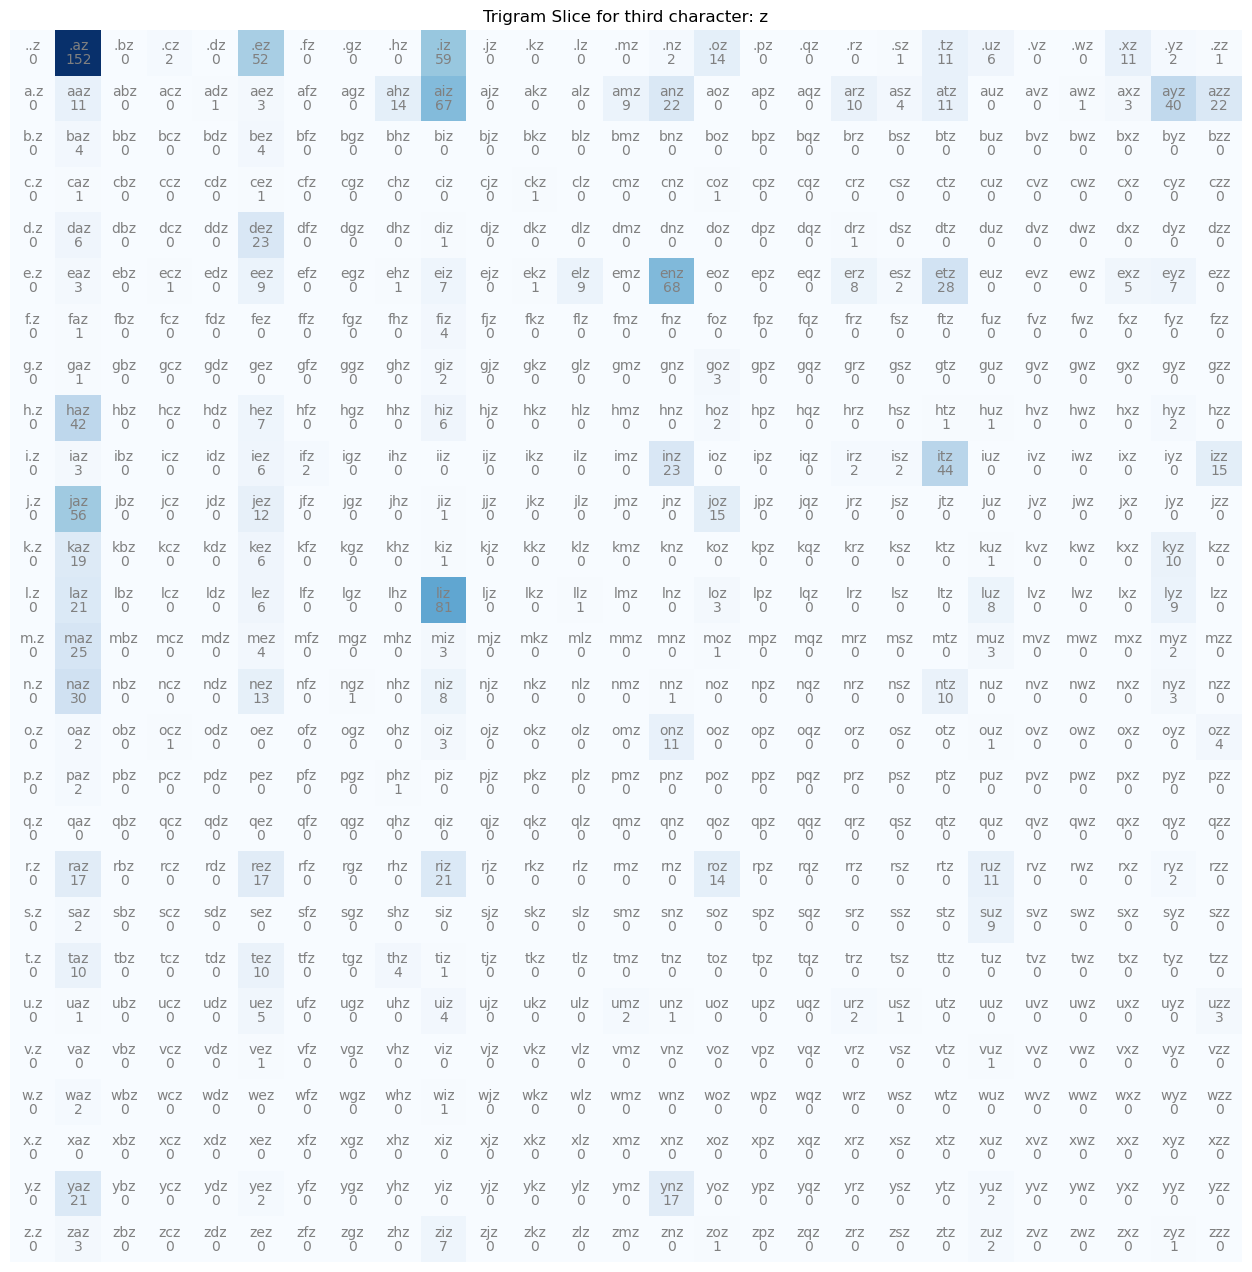

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Loop over the third dimension (for trigrams)
for k in range(27):
    plt.figure(figsize=(16, 16))
    
    # Display the slice corresponding to the third character (k-th slice in the 3D matrix)
    plt.imshow(N[:, :, k], cmap='Blues')
    
    # Iterate over the first two dimensions (i and j) for each slice
    for i in range(27):
        for j in range(27):
            chstr = itos[i] + itos[j] + itos[k]  # Construct the trigram string
            plt.text(j, i, chstr, ha="center", va="bottom", color='gray')  # Display trigram
            plt.text(j, i, N[i, j, k].item(), ha="center", va="top", color='gray')  # Display count
            
    plt.title(f"Trigram Slice for third character: {itos[k]}")
    plt.axis('off')
    plt.show()


In [13]:
N[0]

tensor([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0],
        [   0,  207,  190,   31,  366,   55,   21,   17,   91,  154,   27,   75,
          632,  384,  623,   10,   17,    9,  482,  194,   72,  152,  243,    6,
           27,  173,  152],
        [   0,  169,    0,    0,    0,  253,    0,    0,    9,   41,    1,    0,
           85,    0,    0,   77,    0,    0,  646,    0,    0,   21,    0,    0,
            0,    4,    0],
        [   0,  628,    0,    0,    0,   65,    0,    0,  352,   44,    2,    0,
           68,    0,    0,  255,    0,    0,   67,    0,    0,   13,    0,    0,
            0,   46,    2],
        [   0,  700,    0,    0,    0,  524,    0,    0,   32,  130,    6,    2,
            2,   19,    3,  119,    0,    0,   77,    1,    0,   35,    3,    6,
            0,   31,    0],
        [   0,   23,   15,    4,   80,    9,   10,

In [14]:
N.shape

torch.Size([27, 27, 27])

In [15]:
p = N[0].float()
p = p / p.sum()


In [16]:
p.sum()

tensor(1.)

In [17]:
g = torch.Generator().manual_seed(2147483646)

# Let's assume you have two previous characters, `ix1` and `ix2`
# ix1: index of the first character
# ix2: index of the second character

# Extract the distribution for the next character given the first two characters
p_trigram = N[ix1, ix2].float()

# Sample the next character based on this trigram distribution
ix3 = torch.multinomial(p_trigram, num_samples=1, replacement=True, generator=g).item()

# Convert index to the corresponding character
itos[ix3]


'.'

In [18]:
N.sum(1, keepdim=True).shape

torch.Size([27, 1, 27])

In [19]:
P = (N+1e-6).float()
P = P / P.sum(2, keepdim=True) # 2 because of 3rd dimensions array, if array was 2nd dimensions it would be 1.
#P is probability matrix like count matrix N

In [20]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix1 = 0  
    ix2 = 0 

    while True:
        # Get the probability distribution for the next character based on the last two characters
        p = P[ix1, ix2].float()

        # Sample the next character
        ix3 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix3])  # Append the sampled character to output

        # Update indices for the next iteration
        ix1, ix2 = ix2, ix3  # Shift indices: ix1 becomes ix2, ix2 becomes the new character ix3

        # Check if the stopping condition is met (e.g., if the sampled character is <E>)
        if ix3 == 0:  # Assuming 0 is the index for <E>
            break

    print(''.join(out))


junide.
ilyasid.
prelay.
ock.
quett.
lailian.
juez.
us.
heah.
yanileniassibiainewin.


In [21]:
#calculating trigram cost

log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        prob = P[ix1, ix2, ix3]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-404377.3750)
nll=tensor(404377.3750)
2.0619611740112305


In [22]:
#PART 2 NEURAL NETWORK WAY

In [23]:
# create the dataset

xs, ys = [], []

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append((ix1,ix2))
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("number of examples: ", num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*2, 27), generator=g, requires_grad=True) #multiply by 2 bec of 2 column in xs
# The two one-hot encoded vectors are concatenated to form a single input vector of size 54 (i.e., 27*2).

number of examples:  392226


In [24]:
import torch.nn.functional as F

F.one_hot(xs[0,0], num_classes=27)

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [31]:

# Gradient Descent
for k in range(100):
  
  # Forward pass
  # One-hot encode both characters (xs[:, 0] and xs[:, 1]) and concatenate them along the feature dimension
  xenc1 = F.one_hot(xs[:, 0], num_classes=27).float()  # One-hot encoding of the first character
  xenc2 = F.one_hot(xs[:, 1], num_classes=27).float()  # One-hot encoding of the second character
  xenc = torch.cat([xenc1, xenc2], dim=1)  # Concatenate the two one-hot encodings

  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(len(xs)), ys].log().mean() + 0.01 * (W**2).mean()  # L2 regularization added to the loss
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.272444725036621
2.2721714973449707
2.2719039916992188
2.271641492843628
2.2713847160339355
2.2711329460144043
2.270886182785034
2.270644187927246
2.27040696144104
2.270174264907837
2.2699460983276367
2.2697224617004395
2.269502878189087
2.269287347793579
2.269075870513916
2.2688682079315186
2.2686643600463867
2.2684645652770996
2.26826810836792
2.2680749893188477
2.267885684967041
2.267699718475342
2.267516613006592
2.2673370838165283
2.267160654067993
2.2669873237609863
2.2668168544769287
2.2666492462158203
2.266484498977661
2.266322612762451
2.2661635875701904
2.2660069465637207
2.265852689743042
2.2657015323638916
2.265552520751953
2.2654058933258057
2.265261650085449
2.265120029449463
2.2649803161621094
2.2648427486419678
2.2647078037261963
2.2645747661590576
2.2644433975219727
2.2643144130706787
2.2641873359680176
2.2640624046325684
2.263939142227173
2.2638180255889893
2.2636985778808594
2.263580799102783
2.26346492767334
2.2633509635925293
2.2632386684417725
2.263127565383911
2

In [26]:
xenc.shape

torch.Size([196113, 54])

In [32]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
    out = []
    ix1, ix2 = 0, 0  # Start with the beginning-of-sequence character (index 0)

    while True:
        # ----------
        # Prepare the input: One-hot encode both characters and concatenate
        xenc1 = F.one_hot(torch.tensor([ix1]), num_classes=27).float()  # First character
        xenc2 = F.one_hot(torch.tensor([ix2]), num_classes=27).float()  # Second character
        xenc = torch.cat([xenc1, xenc2], dim=1)  # Concatenate the two one-hot encodings

        # Pass through the model: compute logits, counts, and probabilities
        logits = xenc @ W  # Predict log-counts
        counts = logits.exp()  # Counts, equivalent to N
        p = counts / counts.sum(1, keepdim=True)  # Probabilities for the next character
        # ----------
        
        # Sample the next character from the probabilities
        ix3 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        
        # Append the sampled character to the output
        out.append(itos[ix3])

        # If the end token (index 0) is sampled, stop generating
        if ix3 == 0:
            break
        
        # Shift the input context: The second character becomes the first, and the new character becomes the second
        ix1, ix2 = ix2, ix3

    # Join the output list to form the generated word and print it
    print(''.join(out))


aunide.
aliasad.
ushfay.
ainn.
aui.
